In [1]:

import sys
sys.path.append('c:\\Users\\rokas\\Documents\\Github\\BCI\\mi-bci\\code')
from helper_functions import setup_logger
from helper_functions.data_procesing.mi_procesing import process_mi_raw
import matplotlib.pyplot as plt
from helper_functions import setup_logger, load_procesed_data
from datasets import Lee2019
import os
import glob
import mne
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.colors import TwoSlopeNorm
from mne.stats import permutation_cluster_1samp_test as pcluster_test

from datasets import Lee2019

log = setup_logger("Lee_preprocess")

dataset = Lee2019()
dataset_no = 20
subject = 10
run = 1
paradigm = "MI"
tmin = -1.2
tmax = 5.2
event_id = dict(left_hand=2, right_hand=1)

In [2]:
raw_fif = dataset.load_one_raw_fif(subject=subject, run=run, paradigm=paradigm)

Opening raw data file c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\raw_fif\20\MI\s10.01_raw.fif...
    Range : 0 ... 1521879 =      0.000 ...  1521.879 secs
Ready.
Reading 0 ... 1521879  =      0.000 ...  1521.879 secs...


Using matplotlib as 2D backend.


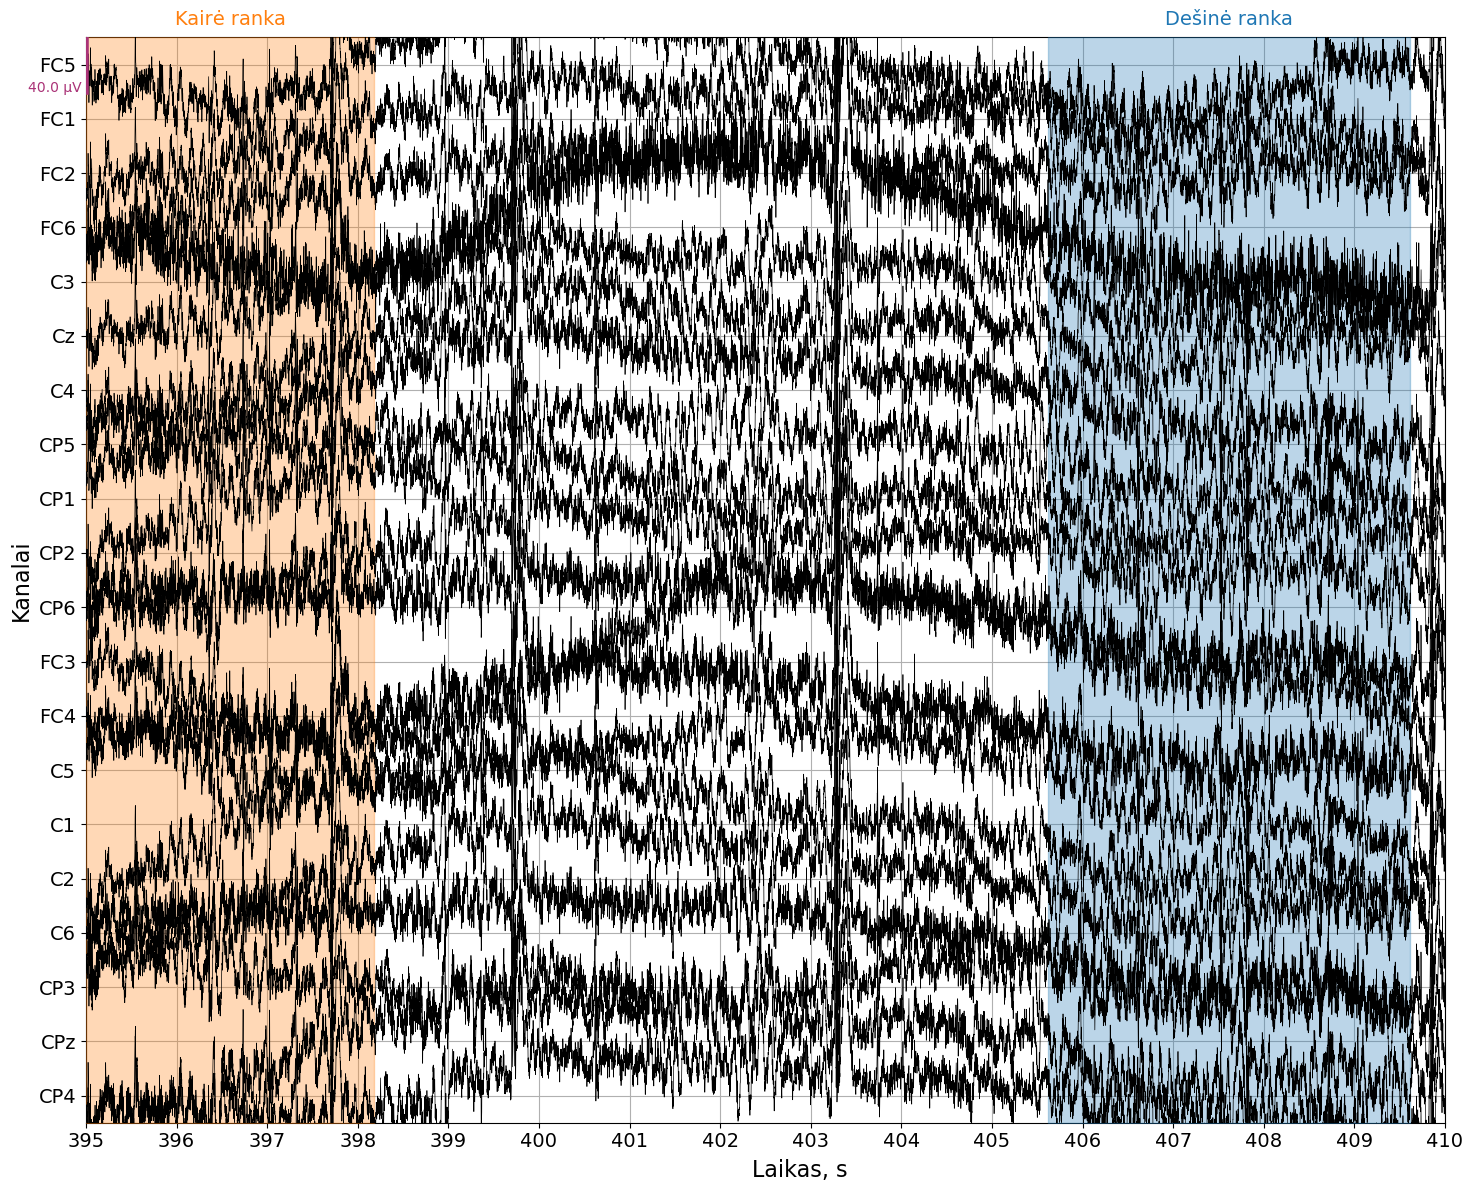

In [3]:
fig = raw_fif.plot(
    start=395,
    duration=15,
    picks=[
        'FC5', 'FC3', 'FC1', 'FC2', 'FC4', 'FC6',
        'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6',
        'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6'
    ],
    show=False,
    block=False
)

fig.set_size_inches(15, 12)

ax_main = fig.axes[0]
ax_main.set_ylabel("Kanalai", fontsize=16)
ax_main.grid(True)
ax_main.tick_params(axis='both', which='major', labelsize=14)

for extra_ax in fig.axes[1:]:
    extra_ax.set_visible(False)

ax_main.text(0.525, -0.05, "Laikas, s", transform=ax_main.transAxes,
             ha='center', fontsize=16)

for txt in fig.findobj(match=plt.Text):
    current_text = txt.get_text()
    if "1" in current_text:
        txt.set_text("Dešinė ranka")
        txt.set_fontsize(14) 
    if "2" in current_text:
        txt.set_text("Kairė ranka")
        txt.set_fontsize(14)  
    if "µV" in current_text:
        txt.set_fontsize(10)

for line in ax_main.get_lines():
    label = line.get_label() 
    # print(label)
    if '_child2'or'_child3' in label:
        line.set_clip_on(True)
        line.set_clip_path(ax_main.patch)
    else:
        line.set_clip_on(False)

xlim = ax_main.get_xlim()
ticks = np.arange(np.floor(xlim[0]), np.ceil(xlim[1]), 1)
ax_main.set_xticks(ticks)

plt.tight_layout()
plt.show()


In [4]:
raw_clean = process_mi_raw(raw_fif.copy())

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 20 (effective, after forward-backward)
- Cutoffs at 8.00, 30.00 Hz: -6.02, -6.02 dB



In [5]:
raw_clean

<Raw | s10.01_raw.fif, 20 x 1521880 (1521.9 s), ~232.3 MB, data loaded>

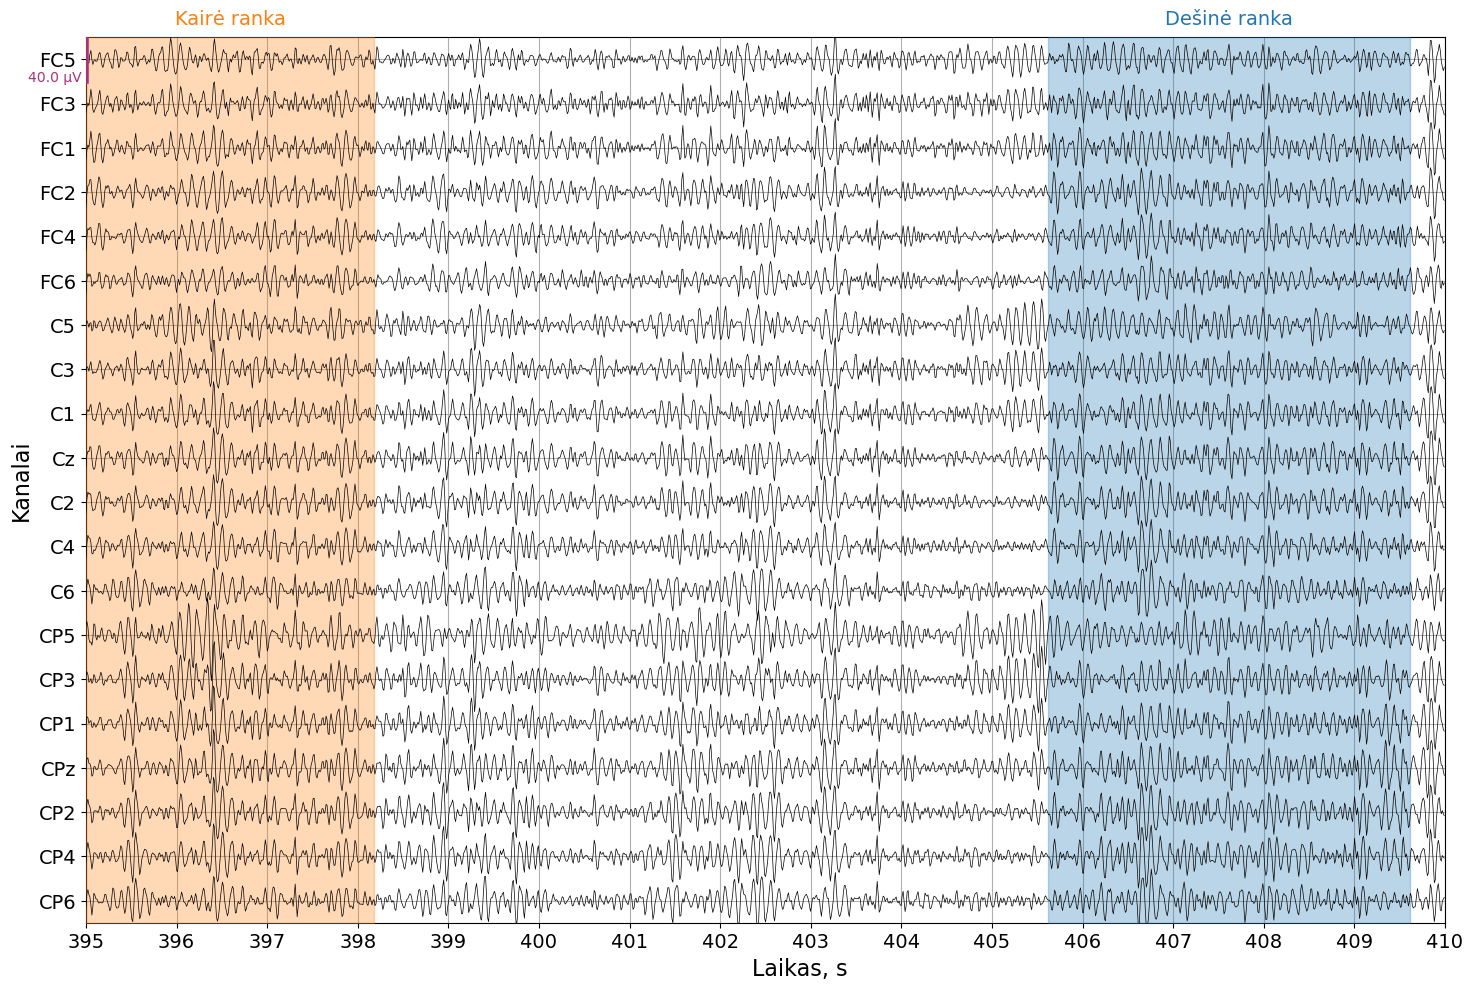

In [6]:
fig = raw_clean.plot(start=395, duration=15,
    picks=[
        'FC5', 'FC3', 'FC1', 'FC2', 'FC4', 'FC6',
        'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6',
        'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6'
    ],
    show=False,
    block=False)

# Change the figure size
fig.set_size_inches(15, 10)

ax_main = fig.axes[0]
ax_main.set_ylabel("Kanalai", fontsize=16)
ax_main.grid(True)
ax_main.tick_params(axis='both', which='major', labelsize=14)

for extra_ax in fig.axes[1:]:
    extra_ax.set_visible(False)

ax_main.text(0.525, -0.06, "Laikas, s", transform=ax_main.transAxes,
             ha='center', fontsize=16)

for txt in fig.findobj(match=plt.Text):
    current_text = txt.get_text()
    if "1" in current_text:
        txt.set_text("Dešinė ranka")
        txt.set_fontsize(14) 
    if "2" in current_text:
        txt.set_text("Kairė ranka")
        txt.set_fontsize(14)  
    if "µV" in current_text:
        txt.set_fontsize(10)

xlim = ax_main.get_xlim()
ticks = np.arange(np.floor(xlim[0]), np.ceil(xlim[1]), 1)
ax_main.set_xticks(ticks)

plt.tight_layout()
plt.show()


Effective window size : 2.048 (s)
Plotting power spectral density (dB=True).
Effective window size : 2.048 (s)


c:\Users\rokas\Documents\GitHub\BCI\mi-bci\.pixi\envs\default\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown


Plotting power spectral density (dB=True).


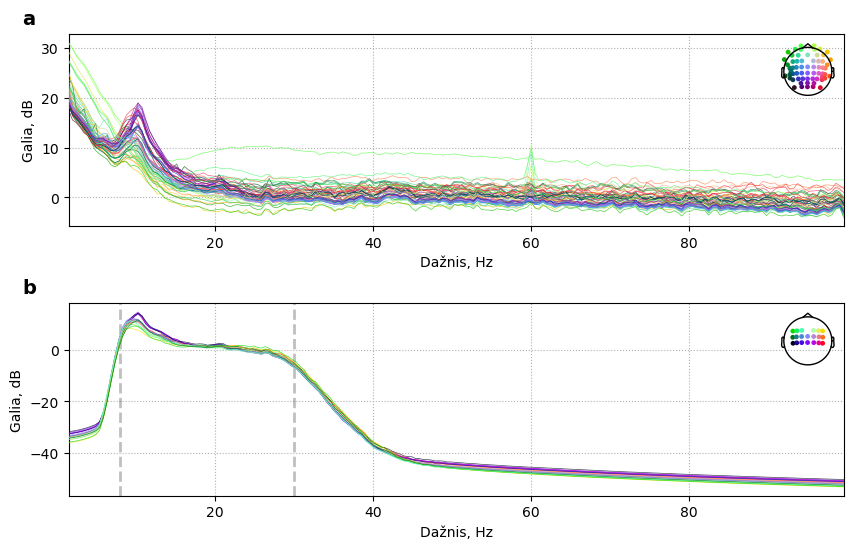

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 1, figsize=(10, 6))
fig.subplots_adjust(hspace=0.4)

raw_fif.compute_psd(fmin=1, fmax=100).plot(axes=[axes[0]])

axes[0].text(-0.06, 1.05, "a", transform=axes[0].transAxes,
             fontsize=14, fontweight='bold')
axes[0].set_title("")
axes[0].set_xlabel("Dažnis, Hz")
axes[0].set_ylabel("Galia, dB")

raw_clean.compute_psd(fmin=1, fmax=100).plot(axes=[axes[1]])

axes[1].text(-0.06, 1.05, "b", transform=axes[1].transAxes,
             fontsize=14,fontweight='bold')
axes[1].set_title("")
axes[1].set_xlabel("Dažnis, Hz")
axes[1].set_ylabel("Galia, dB")

plt.show()

In [8]:
subject = 33
run = 1

data = load_procesed_data(dataset_no, paradigm, subject, run, include=['epochs_raw'], extra_mark='(-5_10)(8_30Hz)')

epochs = data["epochs_raw"]

vmin = -1 
vmax= 1.5
baseline=(-1, 0) 
tmin= -1.0
tmax= 4.0 

freqs = np.arange(8, 30) 
event_ids = epochs.event_id  
cnorm = TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax) 

tfr = epochs.compute_tfr(
    method="multitaper",
    freqs=freqs,
    n_cycles=freqs,
    use_fft=True,
    return_itc=False,
    average=False,
    decim=2,
    n_jobs=-1,
)

Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\procesed\20\MI\(-5_10)(8_30Hz)\33\1\s33.01_epochs_raw-epo.fif ...


    Found the data of interest:
        t =   -5000.00 ...   10000.00 ms
        0 CTF compensation matrices available
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


KeyboardInterrupt: 

In [10]:
tfr_path=glob.glob(r'C:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\*13.01(-5_10)(8_30Hz)autore_tfr_data.h5')

In [13]:
tfr = mne.time_frequency.read_tfrs(tfr_path[0])


Reading C:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s13.01(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\3849733964.py:1: RuntimeWarning: This filename (C:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s13.01(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_path[0])


In [14]:
tfr.crop(
    tmin, tmax).apply_baseline(baseline, mode="percent")

df = tfr.to_data_frame(time_format=None, long_format=True)

Applying baseline correction (mode: percent)
Converting "condition" to "category"...
Converting "epoch" to "category"...
Converting "channel" to "category"...
Converting "ch_type" to "category"...


In [15]:
freq_bounds = {"_": 7,"alpha": 13, "beta": 30}
df["band"] = pd.cut(
    df["freq"], list(freq_bounds.values()), labels=list(freq_bounds)[1:]
)
df = df.dropna()

df = df[df["channel"].isin(["C3", "Cz", "C4"])].copy()

df["channel"] = df["channel"].astype("category")
df["channel"] = df["channel"].cat.set_categories(["C3", "Cz", "C4"], ordered=True)

df['condition'] = df['condition'].replace({'left_hand': 'Kairė ranka', 'right_hand': 'Dešinė ranka'})

C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\3798865531.py:12: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['condition'] = df['condition'].replace({'left_hand': 'Kairė ranka', 'right_hand': 'Dešinė ranka'})


1 subject

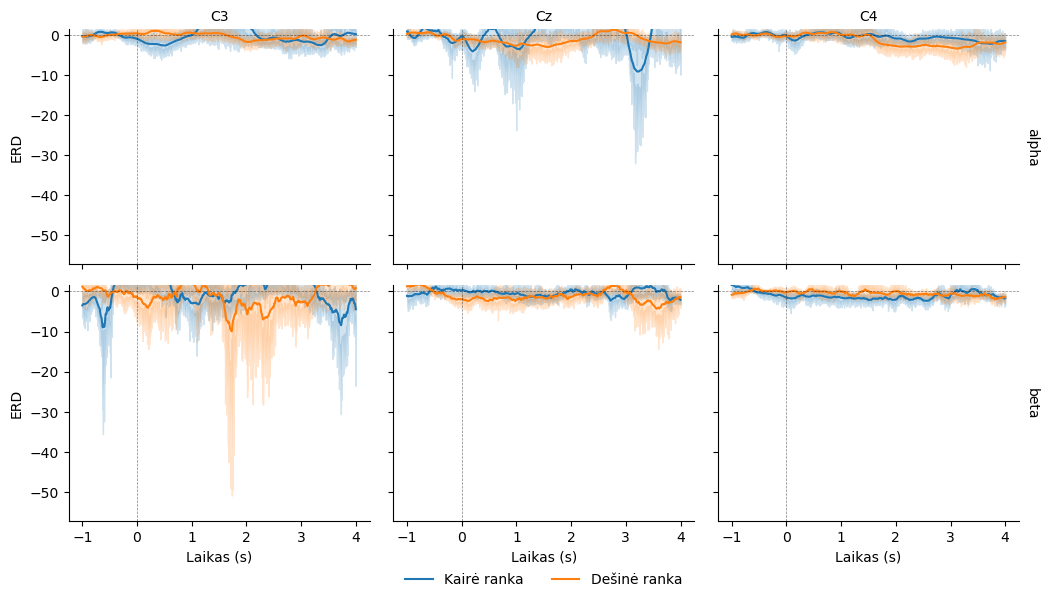

In [16]:
g = sns.FacetGrid(df, row="band", col="channel", margin_titles=True)
g.map(sns.lineplot, "time", "value", "condition", n_boot=10)

axline_kw = dict(color="black", linestyle="dashed", linewidth=0.5, alpha=0.5)
g.map(plt.axhline, y=0, **axline_kw)
g.map(plt.axvline, x=0, **axline_kw)

g.set(ylim=(None, 1.5))
g.set_axis_labels("Laikas (s)", "ERD")
g.set_titles(col_template="{col_name}", row_template="{row_name}")

g.add_legend(ncol=2, loc='lower center', bbox_to_anchor=(0.5, -0.05))

g.fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.08)

plt.show()
plt.tight_layout()
plt.close()

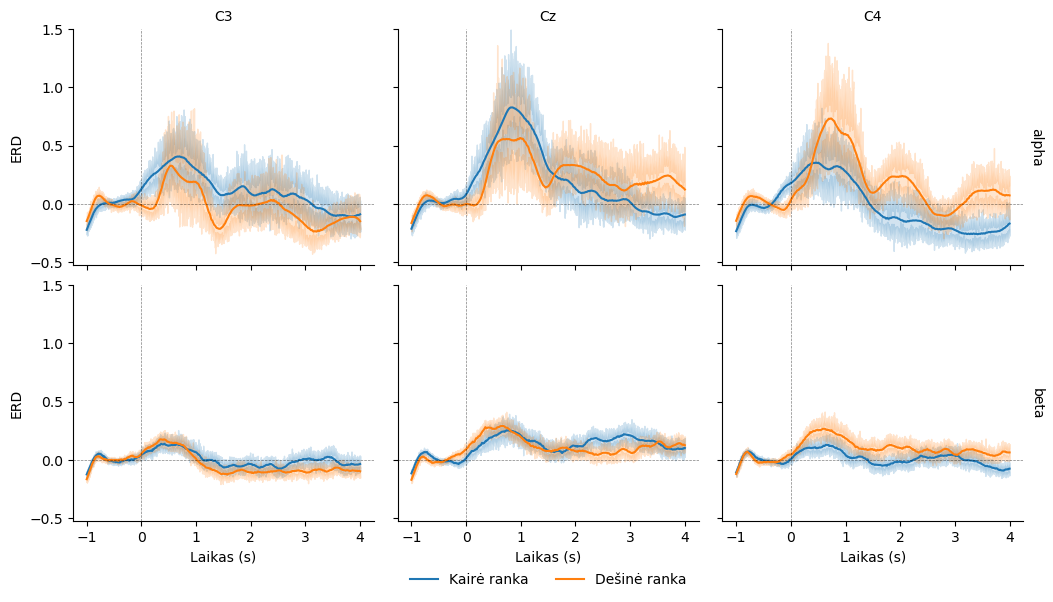

In [ ]:
baseline=(-1, 0) 
tmin= -1.0
tmax= 4.0 

freqs = np.arange(8, 30) 
            
for subject in range(0,54):
    for run in [1,2]:
        try:
            data = load_procesed_data(dataset_no = 20, paradigm='MI', subject=subject, run=run, include=['epochs_raw'])
            epochs = data["epochs_raw"]
            
            # Compute time-frequency representation (No changes)
            tfr = epochs.compute_tfr(
                method="multitaper",
                freqs=freqs,
                n_cycles=freqs,
                use_fft=True,
                return_itc=False,
                average=False,
                decim=2,
                n_jobs=-1,
            )
            tfr.crop(tmin, tmax).apply_baseline(baseline, mode="percent")

            tfr_base_path = os.path.join(os.getcwd(), 'data','tfr','20')
            os.makedirs(tfr_base_path,exist_ok=True)
            tfr_path = os.path.join(tfr_base_path, f's{subject:02}.{run:02}_tfr_data.h5')
            tfr.save(tfr_path, overwrite=True)
            
        except Exception as e:
            print(f"An error occurred: {e}")

In [24]:
paths_epo = []
paths_epo_autore = []

for subject in range(1,55):
    for run in [1,2]:
        try:
            tfr_path_epo_autore = glob.glob(os.path.join(os.getcwd(), 
                                                  'data','tfr','20',f's{subject:02}.{run:02}*_*)autore*.h5'))

            paths_epo_autore.append(tfr_path_epo_autore)

            tfr_path_epo = glob.glob(os.path.join(os.getcwd(), 
                                                  'data','tfr','20',f's{subject:02}.{run:02}*_*Hz)_tfr*.h5'))

            paths_epo.append(tfr_path_epo)
        except Exception as e:
            # Log the error and continue with the next iteration
            log.error(f"Error processing subject {subject}, run {run}")
            log.error(f"Error details: {e}")
            continue
tfr_paths_epo = [path for path in paths_epo if path]
tfr_paths_epo_autore = [path for path in paths_epo_autore if path]



In [51]:
import re
def extract_pair(path):
    """
    Given a filepath string, return (subject, run) as ints,
    e.g. '...s01.02...' → (1, 2)
    """
    m = re.search(r's(\d+)\.(\d+)', path)
    return (int(m.group(1)), int(m.group(2))) if m else None

# build sets of (subj, run)
pairs_epo     = { extract_pair(p[0]) for p in tfr_paths_epo }
pairs_autore  = { extract_pair(p[0]) for p in tfr_paths_epo_autore }

# find intersection
common_pairs = pairs_epo & pairs_autore

# filter each list down to only common subj/run
filtered_epo    = [p for p in tfr_paths_epo    if extract_pair(p[0]) in common_pairs]
filtered_autore = [p for p in tfr_paths_epo_autore if extract_pair(p[0]) in common_pairs]


In [52]:
tfr_paths_epo = filtered_autore

In [54]:
# tfrs = []
tfr_right = []
tfr_left = []
            # events = dict(left_hand=2, right_hand=1)

for tfr_file in tfr_paths_epo:
    tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list
    tfr_left.append(tfr['left_hand'].average())
    tfr_right.append(tfr['right_hand'].average())
    # tfrs.append(tfr) #

Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s01.01(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s01.01(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s01.02(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s01.02(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s02.01(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s02.01(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s02.02(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s02.02(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s03.01(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s03.01(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s03.02(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s03.02(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s04.01(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s04.01(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s04.02(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s04.02(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s05.01(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s05.01(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s06.01(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s06.01(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s09.01(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s09.01(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s09.02(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s09.02(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s10.01(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s10.01(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s11.01(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s11.01(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s11.02(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s11.02(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s12.01(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s12.01(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s12.02(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s12.02(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s13.01(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s13.01(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s13.02(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s13.02(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s14.01(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s14.01(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s14.02(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s14.02(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s15.01(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s15.01(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s15.02(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s15.02(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s16.01(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s16.01(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s16.02(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s16.02(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s17.01(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s17.01(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s17.02(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s17.02(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s18.01(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s18.01(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s18.02(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s18.02(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s19.01(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s19.01(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s19.02(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s19.02(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s20.01(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s20.01(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s20.02(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s20.02(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s21.01(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s21.01(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s21.02(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s21.02(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s22.01(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s22.01(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s22.02(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s22.02(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s23.01(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s23.01(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s23.02(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s23.02(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s24.01(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s24.01(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s24.02(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s24.02(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s25.02(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s25.02(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s26.01(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s26.01(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s26.02(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s26.02(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s27.01(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s27.01(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s27.02(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s27.02(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s28.01(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s28.01(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s28.02(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s28.02(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s29.01(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s29.01(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s29.02(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s29.02(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s30.01(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s30.01(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s30.02(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s30.02(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s31.01(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s31.01(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s31.02(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s31.02(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s34.01(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s34.01(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s34.02(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s34.02(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s35.01(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s35.01(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s35.02(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s35.02(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s36.01(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s36.01(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s36.02(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s36.02(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s37.01(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s37.01(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s37.02(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s37.02(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s38.01(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s38.01(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s40.01(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s40.01(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s40.02(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s40.02(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s41.01(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s41.01(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s41.02(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s41.02(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s42.01(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s42.01(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s42.02(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s42.02(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s43.01(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s43.01(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s43.02(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s43.02(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s44.01(-5_10)(8_30Hz)autore_tfr_data.h5 ...


C:\Users\rokas\AppData\Local\Temp\ipykernel_28832\628411445.py:7: RuntimeWarning: This filename (c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\tfr\20\s44.01(-5_10)(8_30Hz)autore_tfr_data.h5) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5, -tfr.hdf5, _tfr.h5 or _tfr.hdf5
  tfr = mne.time_frequency.read_tfrs(tfr_file[0])  # Reading the first object from the list


In [49]:
grand_tfr_epo_right =  mne.grand_average(tfr_right)
grand_tfr_epo_left =  mne.grand_average(tfr_left)

Identifying common channels ...
Identifying common channels ...


Converting "channel" to "category"...
Converting "ch_type" to "category"...
Converting "channel" to "category"...
Converting "ch_type" to "category"...


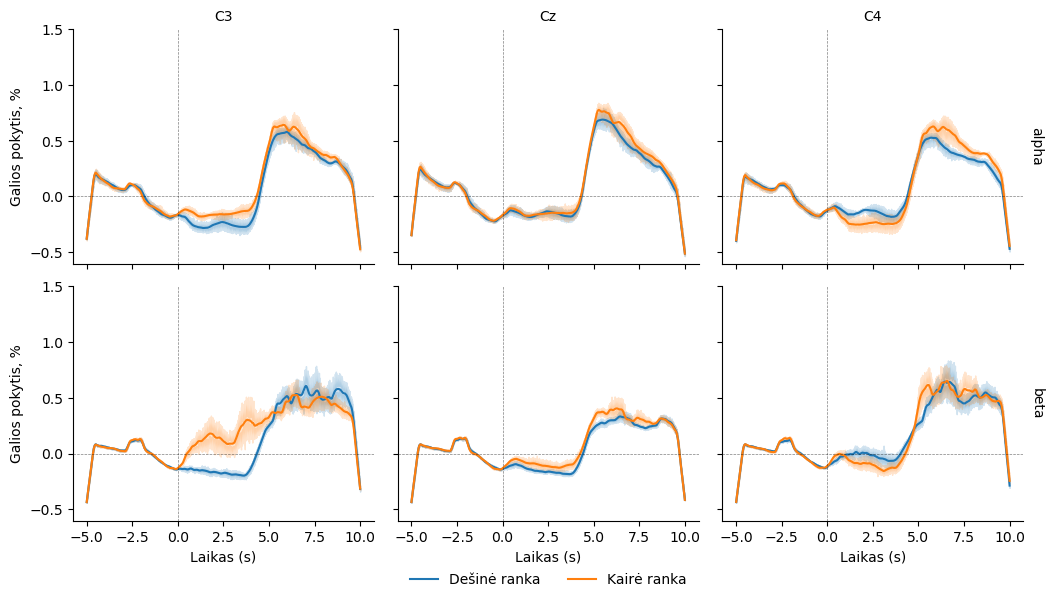

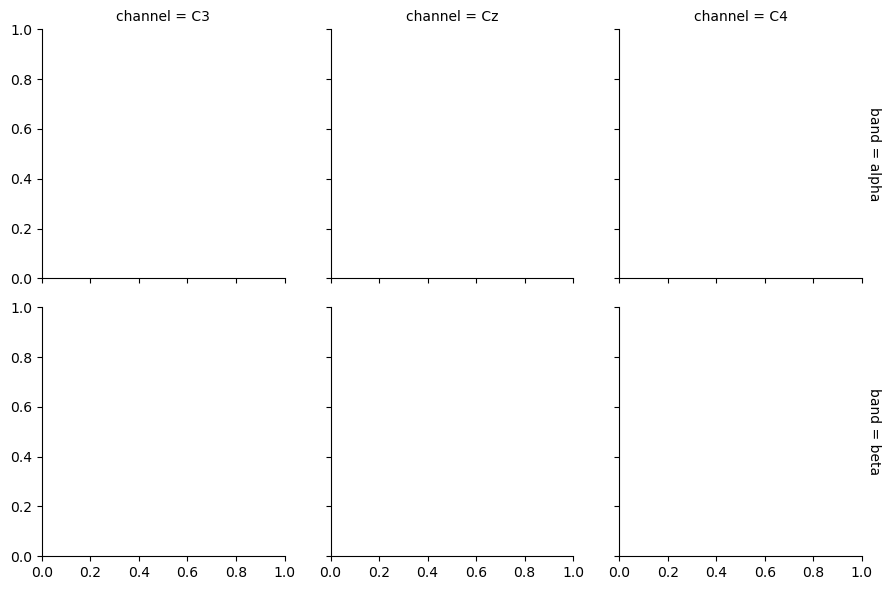

In [55]:
def tfr_lineplot(grand_tfr_left=None, grand_tfr_right=None):
    # Convert TFR to DataFrame in long format

    df = grand_tfr_right.to_data_frame(time_format=None, long_format=True)
    df['condition'] = 'right_hand'

    df_2 = grand_tfr_left.to_data_frame(time_format=None, long_format=True)
    df_2['condition'] = 'left_hand'
    df = pd.concat([df, df_2], ignore_index=True)
    
    freq_bounds = {"_": 7,"alpha": 13, "beta": 30}
    df["band"] = pd.cut(
        df["freq"], list(freq_bounds.values()), labels=list(freq_bounds)[1:]
    )
    df = df.dropna()

    df = df[df["channel"].isin(["C3", "Cz", "C4"])].copy()

    df["channel"] = df["channel"].astype("category")
    df["channel"] = df["channel"].cat.set_categories(["C3", "Cz", "C4"], ordered=True)

    df['condition'] = df['condition'].replace({'left_hand': 'Kairė ranka', 'right_hand': 'Dešinė ranka'})
    
    # Create the FacetGrid plot
    g = sns.FacetGrid(df, row="band", col="channel", margin_titles=True)
    g.map(sns.lineplot, "time", "value", "condition", n_boot=10)

    # Add vertical and horizontal reference lines
    axline_kw = dict(color="black", linestyle="dashed", linewidth=0.5, alpha=0.5)
    g.map(plt.axhline, y=0, **axline_kw)
    g.map(plt.axvline, x=0, **axline_kw)

    # Set plot limits and labels
    g.set(ylim=(None, 1.5))
    g.set_axis_labels("Laikas (s)", "Galios pokytis, %")
    g.set_titles(col_template="{col_name}", row_template="{row_name}")
    
    # Add a legend
    g.add_legend(ncol=2, loc='lower center', bbox_to_anchor=(0.5, -0.05))
    
    # Adjust the subplot layout
    g.fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.08)
    
    g = sns.FacetGrid(df, row="band", col="channel", margin_titles=True)
    # Save the plot if requested

    plt.show()

    # Close the plot to avoid memory issues with multiple plots
    plt.close()

tfr_lineplot(grand_tfr_left=grand_tfr_epo_left, grand_tfr_right=grand_tfr_epo_right)

In [40]:
data_article = pd.read_excel(r'C:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\full_converted_data.xlsx')

In [15]:
def clean_results(paths):
    evaluations = {}
    cross_evaluations = {}

    for path in paths:
        filename = os.path.basename(path)
        subject = filename.split('_')[-3]
        file = pd.read_pickle(path)
        file_run_cross = file['cross_session']
        cross_evaluations[subject] = file_run_cross
        
        for run in [1,2]:
            file_run = file['within_session'][run]
            file_run.pop('single_pipeline')
            subject_run = subject + '_' + str(run)
            evaluations[subject_run] = file_run
            
    records = []
    records_cross = []
    # rename loop var so we don't overwrite `records` itself
    for recs, evaluation in zip([records, records_cross],
                                [evaluations, cross_evaluations]):
        for eval_date, pipelines in evaluation.items():
            for pipeline, metrics in pipelines.items():
                record = {'evaluation': eval_date, 'pipeline': pipeline}
                for key, value in metrics.items():
                    if isinstance(value, dict):
                        for subkey, subvalue in value.items():
                            record[f"{key}_{subkey}"] = subvalue
                    else:
                        record[key] = value
                recs.append(record)

    df = pd.DataFrame(records)
    df_cross = pd.DataFrame(records_cross)

    metrics = ['train_accuracy', 'train_roc_auc', 'val_accuracy', 'val_roc_auc']

    # Expand each metric column: convert each list in the column into separate columns.
    for col in metrics:
        # Convert the list values into a DataFrame. Each row's list becomes a row in the new DataFrame.
        expanded = pd.DataFrame(df[col].tolist(), index=df.index)
        # Rename the new columns to include the metric name (e.g. train_accuracy_0, train_accuracy_1, ...)
        expanded = expanded.add_prefix(col + '_')
        # Drop the original list column and join the new expanded columns.
        df = df.drop(columns=[col]).join(expanded)

    # Now, to reorder the columns so that for each pass the four metrics are together:
    # First, determine the number of passes from one of the expanded metric columns.
    n_passes = df.filter(regex=r'^train_accuracy_').shape[1]

    # Collect the metric columns in the order: first pass, second pass, etc.
    ordered_metric_cols = []
    for i in range(n_passes):
        for metric in metrics:
            col_name = f"{metric}_{i}"
            if col_name in df.columns:
                ordered_metric_cols.append(col_name)

    # Get the non-expanded columns (e.g. evaluation, pipeline, etc.)
    other_cols = [col for col in df.columns if not any(col.startswith(m + '_') for m in metrics)]

    # Create the final DataFrame with the desired column order:
    # identifiers first, then the grouped metric columns.
    df = df[other_cols + ordered_metric_cols]

    df_within = df[['evaluation', 'pipeline', 'mean_train_accuracy', 'mean_train_auc','mean_val_accuracy','mean_val_auc']]
    df_cross = df_cross[['evaluation', 'pipeline', 'test_accuracy', 'test_roc_auc']]
    
    return df_within, df_cross

In [10]:
paths = glob.glob(r'C:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\results\pipeline_scores\lee2019\2025-04-20\*.pkl')

In [ ]:
extra='cross_session'

In [ ]:
file = pd.read_pickle(glob.glob(r'C:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\results\pipeline_scores\lee2019\2025-04-16\*.pkl')[0])

In [18]:
df_raw, _ = clean_results(glob.glob(r'C:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\results\pipeline_scores\lee2019\2025-04-25\**.pkl'))


In [19]:
df_raw

evaluation   pipeline  mean_train_accuracy  mean_train_auc  \
0          01_1    CSP_SVM               0.6400        0.696125   
1          01_1     CSP_LR               0.5950        0.639375   
2          01_1    CSP_LDA               0.5950        0.648125   
3          01_1     CSP_RF               1.0000        1.000000   
4          01_1   CSSP_SVM               0.6350        0.698875   
...         ...        ...                  ...             ...   
3739       53_2  LogVar_RF               1.0000        1.000000   
3740       53_2     TS_SVM               1.0000        1.000000   
3741       53_2      TS_LR               0.9975        0.999750   
3742       53_2     TS_LDA               0.8475        0.909250   
3743       53_2      TS_RF               1.0000        1.000000   

      mean_val_accuracy  mean_val_auc  
0                  0.55         0.626  
1                  0.61         0.610  
2                  0.55         0.582  
3                  0.56         0.589  
4                  0.54         0.614  
...                 ...           ...  
3739               0.47         0.389  
3740               0.58         0.672  
3741               0.59         0.686  
3742               0.63         0.680  
3743               0.60         0.652  

[3744 rows x 6 columns]

In [20]:
df_raw
# Split the evaluation column into subject and run


# Drop unwanted columns


evaluation   pipeline  mean_train_accuracy  mean_train_auc  \
0          01_1    CSP_SVM               0.6400        0.696125   
1          01_1     CSP_LR               0.5950        0.639375   
2          01_1    CSP_LDA               0.5950        0.648125   
3          01_1     CSP_RF               1.0000        1.000000   
4          01_1   CSSP_SVM               0.6350        0.698875   
...         ...        ...                  ...             ...   
3739       53_2  LogVar_RF               1.0000        1.000000   
3740       53_2     TS_SVM               1.0000        1.000000   
3741       53_2      TS_LR               0.9975        0.999750   
3742       53_2     TS_LDA               0.8475        0.909250   
3743       53_2      TS_RF               1.0000        1.000000   

      mean_val_accuracy  mean_val_auc  
0                  0.55         0.626  
1                  0.61         0.610  
2                  0.55         0.582  
3                  0.56         0.589  
4                  0.54         0.614  
...                 ...           ...  
3739               0.47         0.389  
3740               0.58         0.672  
3741               0.59         0.686  
3742               0.63         0.680  
3743               0.60         0.652  

[3744 rows x 6 columns]

In [37]:
df_raw, _= clean_results(glob.glob(r'C:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\results\pipeline_scores\lee2019\2025-04-25\*.pkl'))
df_check = df_raw.copy()

df_raw[['subject', 'run']] = df_raw['evaluation'].str.split('_', expand=True)
# df_raw = df_raw.drop(['evaluation', 'mean_train_accuracy', 'mean_train_auc', 'mean_val_auc'], axis=1)
# df_raw['accuracy'] = df_raw['mean_val_accuracy'] * 100

# # Create a new subject label, e.g. "01" becomes "s1"
# df_raw['Subject'] = 's' + df_raw['subject'].astype(int).astype(str)

df_raw


evaluation   pipeline  mean_train_accuracy  mean_train_auc  \
0          01_1    CSP_SVM               0.6400        0.696125   
1          01_1     CSP_LR               0.5950        0.639375   
2          01_1    CSP_LDA               0.5950        0.648125   
3          01_1     CSP_RF               1.0000        1.000000   
4          01_1   CSSP_SVM               0.6350        0.698875   
...         ...        ...                  ...             ...   
3739       53_2  LogVar_RF               1.0000        1.000000   
3740       53_2     TS_SVM               1.0000        1.000000   
3741       53_2      TS_LR               0.9975        0.999750   
3742       53_2     TS_LDA               0.8475        0.909250   
3743       53_2      TS_RF               1.0000        1.000000   

      mean_val_accuracy  mean_val_auc subject run  
0                  0.55         0.626      01   1  
1                  0.61         0.610      01   1  
2                  0.55         0.582      01   1  
3                  0.56         0.589      01   1  
4                  0.54         0.614      01   1  
...                 ...           ...     ...  ..  
3739               0.47         0.389      53   2  
3740               0.58         0.672      53   2  
3741               0.59         0.686      53   2  
3742               0.63         0.680      53   2  
3743               0.60         0.652      53   2  

[3744 rows x 8 columns]

In [38]:
import pandas as pd
import glob

# Load data from the pickle files (assumes clean_results is defined elsewhere)
df_raw, _= clean_results(glob.glob(r'C:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\results\pipeline_scores\lee2019\2025-04-25\*.pkl'))
df_check = df_raw.copy()

# Split the evaluation column into subject and run
df_raw[['subject', 'run']] = df_raw['evaluation'].str.split('_', expand=True)

# Drop unwanted columns
df_raw = df_raw.drop(['evaluation', 'mean_train_accuracy', 'mean_train_auc', 'mean_val_auc'], axis=1)

# Calculate accuracy as percentage from mean_val_accuracy
df_raw['accuracy'] = df_raw['mean_val_accuracy'] * 100

# Create a new subject label, e.g. "01" becomes "s1"
df_raw['Subject'] = 's' + df_raw['subject'].astype(int).astype(str)

# Create new column names only for the specified pipelines:
#   - "CSP_LR" becomes "CSP_Se{run}"
#   - "CSSP_LR" becomes "CSSP_Se{run}"
#   - "FBCSP_LR" becomes "FBCSP_Se{run}"
#   - "BSSFO_LR" becomes "BSSFO_Se{run}"
df_raw['new_col'] = df_raw.apply(
    lambda row: (
        f"CSP_Se{int(row['run'])}" if row['pipeline'].startswith('CSP_LR') else
        f"CSSP_Se{int(row['run'])}" if row['pipeline'].startswith('CSSP_LR') else
        f"FBCSP_Se{int(row['run'])}" if row['pipeline'].startswith('FBCSP_LR') else
        f"BSSFO_Se{int(row['run'])}" if row['pipeline'].startswith('BSSFO_LR') else
        None
    ),
    axis=1
)

# Drop rows where new_col is None (i.e. pipelines not of interest)
df_raw = df_raw.dropna(subset=['new_col'])

# Pivot the DataFrame so that Subjects become rows and new_col values become columns.
# Then, reset the index so that Subject remains as a separate column.
df_wide = df_raw.pivot_table(index='Subject', columns='new_col', values='accuracy')
df_wide = df_wide.reset_index()

# Print pivoted columns
print("Pivot columns:", df_wide.columns.tolist())

# (Optional) Sort the DataFrame by subject.
# If subjects are of the form "s<number>", we can sort them numerically.
df_wide['s_num'] = df_wide['Subject'].str.extract('s(\d+)', expand=False).astype(int)
df_wide = df_wide.sort_values('s_num').drop(columns='s_num')

# Add summary rows for the mean and standard deviation (numeric columns only)
# Here, you might compute summaries for the pipeline columns only.
pipeline_cols = [col for col in df_wide.columns if col != 'Subject']
mean_row = pd.DataFrame([df_wide[pipeline_cols].mean(numeric_only=True)], columns=pipeline_cols)
mean_row['Subject'] = 'mean'
std_row = pd.DataFrame([df_wide[pipeline_cols].std(numeric_only=True)], columns=pipeline_cols)
std_row['Subject'] = 'std'
df_wide = pd.concat([df_wide, mean_row, std_row], ignore_index=True)



Pivot columns: ['Subject', 'BSSFO_Se1', 'BSSFO_Se2', 'CSP_Se1', 'CSP_Se2', 'CSSP_Se1', 'CSSP_Se2', 'FBCSP_Se1', 'FBCSP_Se2']


<>:49: DeprecationWarning: invalid escape sequence '\d'


In [41]:
df_wide= df_wide.iloc[:52]
data_article = data_article.iloc[:53].drop([38])

In [42]:
import pandas as pd

# Sort the DataFrames by Subject and reset the index
data_article = data_article.sort_values('Subject').reset_index(drop=True)
df_wide = df_wide.sort_values('Subject').reset_index(drop=True)

# Set "Subject" as index and add a marker suffix for each DataFrame
data_article_temp = data_article.set_index('Subject')
data_article_temp.columns = [f"{col}_art" for col in data_article_temp.columns]

df_wide_temp = df_wide.set_index('Subject')
df_wide_temp.columns = [f"{col}_cal" for col in df_wide_temp.columns]

# Concatenate the DataFrames horizontally and reset index so that "Subject" is a column
combined = pd.concat([data_article_temp, df_wide_temp], axis=1).reset_index()

# Drop any columns with NaN labels (if any)
combined = combined.loc[:, combined.columns.notnull()]

# --- Reorder the columns ---
# Define the desired pipeline order (without suffixes)
desired_order = ['BSSFO_Se1', 'BSSFO_Se2', 'CSP_Se1', 'CSP_Se2', 
                 'CSSP_Se1', 'CSSP_Se2', 'FBCSP_Se1', 'FBCSP_Se2']

# Build new column order: Subject, then all _art columns in desired order, then all _cal columns in desired order.
new_order = ['Subject'] + \
            [f"{col}_art" for col in desired_order if f"{col}_art" in combined.columns] + \
            [f"{col}_cal" for col in desired_order if f"{col}_cal" in combined.columns]

# Reorder the DataFrame columns
combined = combined[new_order]

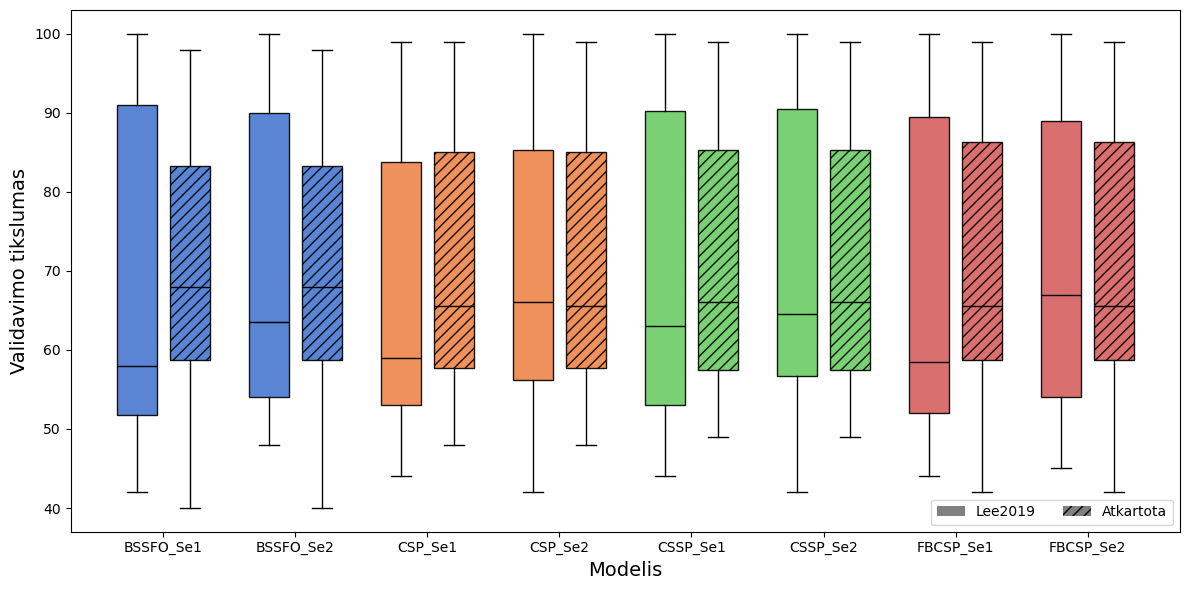

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Assume 'combined' is already defined.
# Melt the combined DataFrame so that each row corresponds to a Subject/Model combination.
df_long = combined.melt(id_vars='Subject', var_name='Model', value_name='Accuracy')

# Extract the pipeline name and source from the 'Model' column.
# We assume the model names are of the form: pipeline_source (e.g., "CSP_Se1_art")
df_long[['pipeline', 'source']] = df_long['Model'].str.rsplit('_', n=1, expand=True)

# (Optional) Compute overall mean per pipeline (ignoring source) and sort pipelines in descending order.
# This is kept in the code below for potential use in colouring.
mean_per_pipeline = df_long.groupby("pipeline")["Accuracy"].mean().sort_values(ascending=False)

# --- New code: Extract session information and create a custom order ---
# Extract session (e.g., Se1 or Se2) from the pipeline name
df_long['session'] = df_long['pipeline'].str.extract(r'(Se\d+)', expand=False)
# Define a categorical order for sessions so that Se1 comes before Se2
df_long['session'] = pd.Categorical(df_long['session'], categories=["Se1", "Se2"], ordered=True)
# Also extract feature extraction method (e.g., "CSP" from "CSP_Se1")
df_long['feature_extraction'] = df_long['pipeline'].str.split('_').str[0]

# Sort the DataFrame by feature extraction and session so that for each feature, Se1 appears before Se2.
new_order = df_long.sort_values(by=['feature_extraction','session'])['pipeline'].unique()

# Set the pipeline column as a categorical with this new custom order.
df_long["pipeline"] = pd.Categorical(df_long["pipeline"], categories=new_order, ordered=True)

# --- Color mapping based on feature extraction ---
unique_features = df_long['feature_extraction'].unique()
# Create a colour palette for the feature extraction methods using the "muted" palette.
feature_palette = dict(zip(unique_features, sns.color_palette("muted", n_colors=len(unique_features))))
# Map each pipeline to a colour based on its feature extraction method.
pipeline_palette = {pipeline: feature_palette[pipeline.split('_')[0]] for pipeline in new_order}

# Create the figure and axis.
fig, ax = plt.subplots(figsize=(12, 6))

# Loop over each pipeline and plot two boxplots: one for 'art' and one for 'cal'
# Position them slightly apart for side-by-side comparison.
for i, pipeline in enumerate(new_order):
    # Select data for the current pipeline and each source.
    data_art = df_long[(df_long["pipeline"] == pipeline) & (df_long["source"] == "art")]["Accuracy"]
    data_cal = df_long[(df_long["pipeline"] == pipeline) & (df_long["source"] == "cal")]["Accuracy"]
    
    # Define positions: art slightly left, cal slightly right.
    pos_art = i - 0.2
    pos_cal = i + 0.2
    
    # Plot boxplots with patch_artist=True to allow custom colouring.
    bp_art = ax.boxplot(data_art, positions=[pos_art], widths=0.3, patch_artist=True, showfliers=False)
    bp_cal = ax.boxplot(data_cal, positions=[pos_cal], widths=0.3, patch_artist=True, showfliers=False)
    
    # Get the base colour for this pipeline.
    color = pipeline_palette[pipeline]
    
    # For 'art', use the base colour with no hatch and full opacity.
    for box in bp_art["boxes"]:
        box.set_facecolor(color)
        box.set_alpha(0.9)
    
    # For 'cal', use the same base colour, add a hatch pattern and set lower opacity.
    for box in bp_cal["boxes"]:
        box.set_facecolor(color)
        box.set_hatch("///")
        box.set_alpha(0.9)  # Set opacity to 50%
    
    # Set median lines to black.
    for median in bp_art["medians"]:
        median.set_color("black")
    for median in bp_cal["medians"]:
        median.set_color("black")

# Set the x-axis ticks to be at the central positions of each pipeline.
ax.set_xticks(range(len(new_order)))
ax.set_xticklabels(new_order, rotation=0)
ax.set_xlabel("Modelis", fontsize=14)
ax.set_ylabel("Validavimo tikslumas", fontsize=14)

# Create custom legend handles.
legend_art = mpatches.Patch(facecolor='grey', label='Lee2019')
legend_cal = mpatches.Patch(facecolor='grey', hatch="///", label='Atkartota')

# Arrange legend in one row so the first entry appears on the left and the second on the right.
ax.legend(handles=[legend_art, legend_cal], loc='lower right', ncol=2, frameon=True)

plt.tight_layout()
plt.show()


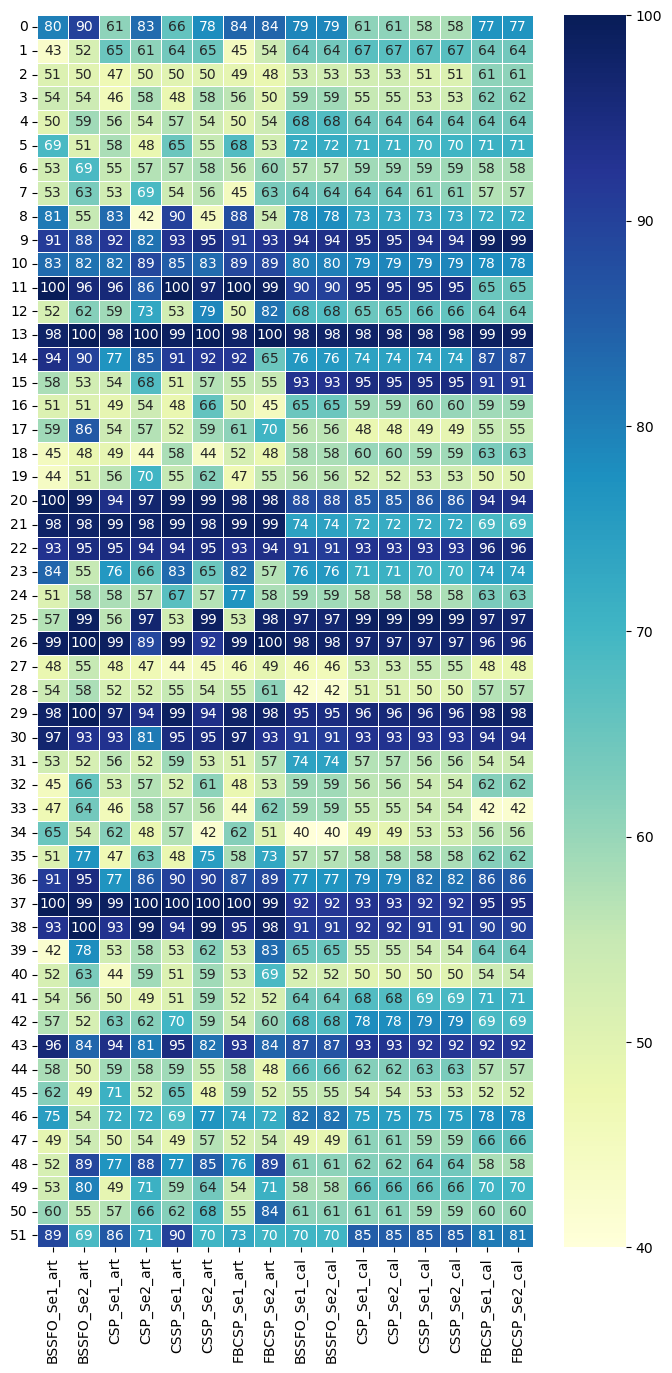

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the columns to plot (all except 'Subject')
selected_columns = combined.columns.drop('Subject')

plt.figure(figsize=(8, 16))
sns.heatmap(
    combined[selected_columns],
    annot=True,
    cmap="YlGnBu",
    linewidths=0.5,
    fmt="g"
)

plt.yticks(rotation=0, ha='right')
plt.show()


In [56]:
df_raw, _ = clean_results(glob.glob(r'C:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\results\pipeline_scores\lee2019\2025-04-25\*.pkl'))
df_auto, _= clean_results(glob.glob(r'C:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\results\pipeline_scores\lee2019\2025-04-25_autoreject\\*.pkl'))


In [107]:
df_raw

evaluation   pipeline  mean_train_accuracy  mean_train_auc  \
0            01    CSP_SVM               0.6400        0.696125   
1            01     CSP_LR               0.5950        0.639375   
2            01    CSP_LDA               0.5950        0.648125   
3            01     CSP_RF               1.0000        1.000000   
4            01   CSSP_SVM               0.6350        0.698875   
...         ...        ...                  ...             ...   
1867         53  LogVar_RF               1.0000        1.000000   
1868         53     TS_SVM               1.0000        1.000000   
1869         53      TS_LR               0.9975        0.999750   
1870         53     TS_LDA               0.8475        0.909250   
1871         53      TS_RF               1.0000        1.000000   

      mean_val_accuracy  mean_val_auc  
0                  0.55         0.626  
1                  0.61         0.610  
2                  0.55         0.582  
3                  0.55         0.589  
4                  0.54         0.614  
...                 ...           ...  
1867               0.46         0.408  
1868               0.58         0.672  
1869               0.59         0.686  
1870               0.63         0.680  
1871               0.62         0.631  

[1872 rows x 6 columns]

In [52]:
df_raw

evaluation   pipeline  test_accuracy  test_roc_auc
0            01    CSP_SVM           0.53           NaN
1            01     CSP_LR           0.51        0.4428
2            01    CSP_LDA           0.51        0.4528
3            01     CSP_RF           0.56        0.6016
4            01   CSSP_SVM           0.55           NaN
...         ...        ...            ...           ...
1867         53  LogVar_RF           0.49        0.4646
1868         53     TS_SVM           0.60           NaN
1869         53      TS_LR           0.63        0.6652
1870         53     TS_LDA           0.56        0.5780
1871         53      TS_RF           0.58        0.5818

[1872 rows x 4 columns]

C:\Users\rokas\AppData\Local\Temp\ipykernel_31276\4213283394.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



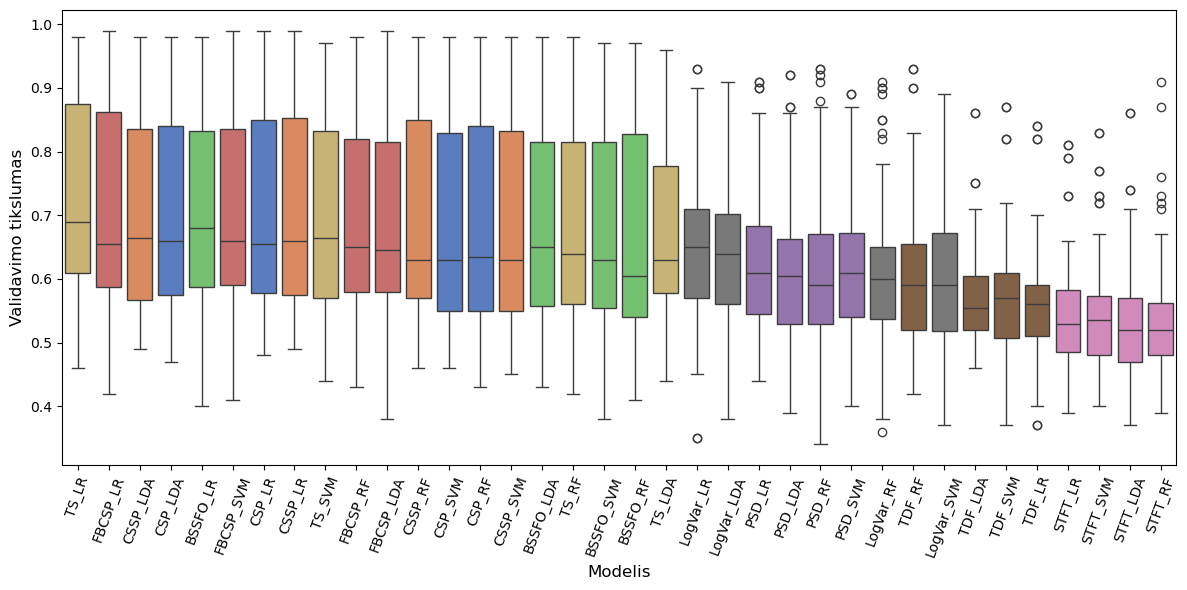

In [57]:
df_plot = df_raw
df_plot['feature_extraction'] = df_plot['pipeline'].str.split('_').str[0]

# Compute overall mean per pipeline and sort in descending order.
mean_per_pipeline = df_plot.groupby("pipeline")["mean_val_accuracy"].mean().sort_values(ascending=False)

# Make 'pipeline' a categorical with the desired order.
df_plot["pipeline"] = pd.Categorical(
    df_plot["pipeline"],
    categories=mean_per_pipeline.index,
    ordered=True
)

# Get the unique feature extraction methods.
unique_features = df_plot['feature_extraction'].unique()

# Create a pastel palette for the feature extraction methods.
feature_palette = dict(zip(unique_features, sns.color_palette("muted", n_colors=len(unique_features))))

# Map each pipeline to a color based on its feature extraction method.
pipeline_palette = {pipeline: feature_palette[pipeline.split('_')[0]] for pipeline in mean_per_pipeline.index}

# Create the boxplot using the mapped palette.
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='pipeline', y='mean_val_accuracy', data=df_plot, palette=pipeline_palette)
plt.xticks(rotation=70)
ax.set_xlabel("Modelis", fontsize=12)         # Rename x-axis
ax.set_ylabel("Validavimo tikslumas", fontsize=12)  # Rename y-axis
plt.tight_layout()
plt.show()


In [58]:
# Compute the average validation accuracy per pipeline
pipeline_avg = df_plot.groupby("pipeline")["mean_val_accuracy"].mean().reset_index()

# Sort the pipelines in descending order (best performing first)
pipeline_avg = pipeline_avg.sort_values(by="mean_val_accuracy", ascending=False)

# Assign a rank: 1 = best
pipeline_avg["rank"] = range(1, len(pipeline_avg) + 1)

pipeline_avg

C:\Users\rokas\AppData\Local\Temp\ipykernel_31276\2911163393.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


pipeline  mean_val_accuracy  rank
0        TS_LR           0.727500     1
1     FBCSP_LR           0.711731     2
2     CSSP_LDA           0.709038     3
3      CSP_LDA           0.706346     4
4     BSSFO_LR           0.706154     5
5    FBCSP_SVM           0.705769     6
6       CSP_LR           0.704615     7
7      CSSP_LR           0.702885     8
8       TS_SVM           0.701731     9
9     FBCSP_RF           0.696923    10
10   FBCSP_LDA           0.694808    11
11     CSSP_RF           0.693750    12
12     CSP_SVM           0.689423    13
13      CSP_RF           0.689327    14
14    CSSP_SVM           0.688846    15
15   BSSFO_LDA           0.687308    16
16       TS_RF           0.682019    17
17   BSSFO_SVM           0.681154    18
18    BSSFO_RF           0.671635    19
19      TS_LDA           0.670000    20
20   LogVar_LR           0.644231    21
21  LogVar_LDA           0.639231    22
22      PSD_LR           0.622692    23
23     PSD_LDA           0.615385    24
24      PSD_RF           0.614038    25
25     PSD_SVM           0.609615    26
26   LogVar_RF           0.603077    27
27      TDF_RF           0.602115    28
28  LogVar_SVM           0.595962    29
29     TDF_LDA           0.571731    30
30     TDF_SVM           0.556731    31
31      TDF_LR           0.550577    32
32     STFT_LR           0.540769    33
33    STFT_SVM           0.538846    34
34    STFT_LDA           0.534423    35
35     STFT_RF           0.532500    36

In [59]:
import pandas as pd

# Compute the average validation accuracy per pipeline.
pipeline_avg = df_plot.groupby("pipeline")["mean_val_accuracy"].mean().reset_index()

# Sort the pipelines in descending order (best performing first)
pipeline_avg = pipeline_avg.sort_values(by="mean_val_accuracy", ascending=False)

# Assign a rank (1 = best) for reference (this rank is for all pipelines)
pipeline_avg["rank"] = range(1, len(pipeline_avg) + 1)

# Extract feature extraction method and classifier from the pipeline names.
# Assuming each pipeline is named in the format "FEATURE_CLASSIFIER"
pipeline_avg["feature_extraction"] = pipeline_avg["pipeline"].apply(lambda x: x.split("_")[0])
pipeline_avg["classifier"] = pipeline_avg["pipeline"].apply(lambda x: x.split("_")[1])

# For each feature extraction method, keep only the pipeline with the highest mean validation accuracy.
best_pipeline_per_feature = pipeline_avg.loc[pipeline_avg.groupby("feature_extraction")["mean_val_accuracy"].idxmax()]

# Now sort the best pipelines by their mean validation accuracy in descending order and assign a new rank.
best_pipeline_per_feature = best_pipeline_per_feature.sort_values(by="mean_val_accuracy", ascending=False)
best_pipeline_per_feature["feature_rank"] = range(1, len(best_pipeline_per_feature) + 1)

best_pipeline_per_feature


C:\Users\rokas\AppData\Local\Temp\ipykernel_31276\3981429061.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


pipeline  mean_val_accuracy  rank feature_extraction classifier  \
0       TS_LR           0.727500     1                 TS         LR   
1    FBCSP_LR           0.711731     2              FBCSP         LR   
2    CSSP_LDA           0.709038     3               CSSP        LDA   
3     CSP_LDA           0.706346     4                CSP        LDA   
4    BSSFO_LR           0.706154     5              BSSFO         LR   
20  LogVar_LR           0.644231    21             LogVar         LR   
22     PSD_LR           0.622692    23                PSD         LR   
27     TDF_RF           0.602115    28                TDF         RF   
32    STFT_LR           0.540769    33               STFT         LR   

    feature_rank  
0              1  
1              2  
2              3  
3              4  
4              5  
20             6  
22             7  
27             8  
32             9

In [60]:
import pandas as pd

# Make a copy of your DataFrame
df = df_plot.copy()

# Extract feature extraction method and classifier from the pipeline names.
# Assuming pipeline names are of the form "FEATURE_CLASSIFIER".
df["feature_extraction"] = df["pipeline"].apply(lambda x: x.split("_")[0])
df["classifier"] = df["pipeline"].apply(lambda x: x.split("_")[1])

# --- Rank Feature Extraction Methods ---
# Compute the average metrics for each feature extraction method.
feature_avg = df.groupby("feature_extraction").agg({
    "mean_train_accuracy": "mean",
    "mean_train_auc": "mean",
    "mean_val_accuracy": "mean",
    "mean_val_auc": "mean"
}).reset_index()

# Sort by mean validation accuracy (best performance first)
feature_avg = feature_avg.sort_values(by="mean_val_accuracy", ascending=False)

# Assign ranking: 1 = best
feature_avg["rank"] = range(1, len(feature_avg) + 1)

# --- Rank Classification Algorithms ---
# Compute the average metrics for each classifier.
classifier_avg = df.groupby("classifier").agg({
    "mean_train_accuracy": "mean",
    "mean_train_auc": "mean",
    "mean_val_accuracy": "mean",
    "mean_val_auc": "mean"
}).reset_index()

# Sort by mean validation accuracy (best performance first)
classifier_avg = classifier_avg.sort_values(by="mean_val_accuracy", ascending=False)

# Assign ranking: 1 = best
classifier_avg["rank"] = range(1, len(classifier_avg) + 1)


classifier_avg
import pandas as pd

# Make a copy of your DataFrame
df = df_plot.copy()

# Extract feature extraction method and classifier from the pipeline names.
# Assuming pipeline names are of the form "FEATURE_CLASSIFIER".
df["feature_extraction"] = df["pipeline"].apply(lambda x: x.split("_")[0])
df["classifier"] = df["pipeline"].apply(lambda x: x.split("_")[1])

# --- Rank Feature Extraction Methods ---
# Compute the average metrics for each feature extraction method.
feature_avg = df.groupby("feature_extraction").agg({
    "mean_train_accuracy": "mean",
    "mean_train_auc": "mean",
    "mean_val_accuracy": "mean",
    "mean_val_auc": "mean"
}).reset_index()

# Sort by mean validation accuracy (best performance first)
feature_avg = feature_avg.sort_values(by="mean_val_accuracy", ascending=False)

# Assign ranking: 1 = best
feature_avg["rank"] = range(1, len(feature_avg) + 1)

# --- Rank Classification Algorithms ---
# Compute the average metrics for each classifier.
classifier_avg = df.groupby("classifier").agg({
    "mean_train_accuracy": "mean",
    "mean_train_auc": "mean",
    "mean_val_accuracy": "mean",
    "mean_val_auc": "mean"
}).reset_index()

# Sort by mean validation accuracy (best performance first)
classifier_avg = classifier_avg.sort_values(by="mean_val_accuracy", ascending=False)

# Assign ranking: 1 = best
classifier_avg["rank"] = range(1, len(classifier_avg) + 1)

classifier_avg

classifier  mean_train_accuracy  mean_train_auc  mean_val_accuracy  \
1         LR             0.857975        0.898932           0.656795   
0        LDA             0.859530        0.917178           0.647585   
2         RF             1.000000        1.000000           0.642821   
3        SVM             0.858264        0.907860           0.640897   

   mean_val_auc  rank  
1      0.696957     1  
0      0.684923     2  
2      0.681025     3  
3      0.681252     4

In [61]:
feature_avg

feature_extraction  mean_train_accuracy  mean_train_auc  mean_val_accuracy  \
3              FBCSP             0.941995        0.976668           0.702308   
2               CSSP             0.862644        0.909957           0.698630   
1                CSP             0.863137        0.909844           0.697428   
8                 TS             0.963233        0.983139           0.695312   
0              BSSFO             0.882115        0.930787           0.686563   
4             LogVar             0.826575        0.886442           0.620625   
5                PSD             0.954411        0.981284           0.615433   
7                TDF             0.806587        0.834268           0.570288   
6               STFT             0.944784        0.966546           0.536635   

   mean_val_auc  rank  
3      0.751993     1  
2      0.743786     2  
1      0.741913     3  
8      0.745514     4  
0      0.733937     5  
4      0.661161     6  
5      0.653868     7  
7      0.593363     8  
6      0.548817     9

In [62]:
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Data Preparation ---
# Assign new source labels to each DataFrame.
df_raw['source'] = 'Be papildomo valymo'
df_auto['source'] = 'Autoreject'
df_cleaned['source'] = 'Pyprep'
df_cleaned_auto['source'] = 'Pyprep + Autoreject'

# Combine all dataframes into one.
df_all = pd.concat([df_raw, df_auto, df_cleaned, df_cleaned_auto], ignore_index=True)

# --- Step 2: One-Way ANOVA on Mean Validation Accuracy ---
# Extract the mean validation accuracy for each source across all pipelines.
groups = [df_all[df_all['source'] == src]['mean_val_accuracy'] 
          for src in ['Be papildomo valymo', 'Autoreject', 'Pyprep', 'Pyprep + Autoreject']]

anova_result = stats.f_oneway(*groups)
print("One-Way ANOVA for Mean Validation Accuracy (All Models Combined):")
print("F-statistic:", anova_result.statistic)
print("p-value:", anova_result.pvalue)

# --- Step 3: Post-hoc Pairwise Comparisons with Tukey HSD ---
tukey_result = pairwise_tukeyhsd(
    endog=df_all['mean_val_accuracy'],  # The metric to compare
    groups=df_all['source'],            # Groups (sources)
    alpha=0.05
)
print("\nTukey HSD Post-hoc Test Results:")
print(tukey_result.summary())

# --- Step 4: Visualize the Differences with Matched Style ---
plt.figure(figsize=(6, 4))
# Use a palette similar in style to your second snippet.
unique_sources = df_all['source'].unique()

palette = dict(zip(unique_sources, sns.color_palette("muted", n_colors=len(unique_sources))))

ax = sns.boxplot(
    x='source', 
    y='mean_val_accuracy', 
    data=df_all, 
    palette=palette,
    patch_artist=True
)

for patch in ax.artists:
    # Get the current facecolor; it's an RGBA tuple.
    current_color = patch.get_facecolor()
    # Create a new RGBA color with the same R, G, B but alpha set to 0.9.
    new_color = (current_color[0], current_color[1], current_color[2], 1)
    patch.set_facecolor(new_color)

# Set labels with consistent font sizes.
plt.xlabel("Papildomo apdorojimo strategija", fontsize=12)
plt.ylabel("Vidutinis tikslumas", fontsize=12)
plt.tight_layout()
plt.show()


NameError: name 'df_cleaned' is not defined

In [275]:
df_check

evaluation   pipeline  mean_train_accuracy  mean_train_auc  \
0         01-01    CSP_SVM               0.5925        0.677000   
1         01-01     CSP_LR               0.5625        0.626125   
2         01-01    CSP_LDA               0.5675        0.632000   
3         01-01     CSP_RF               1.0000        1.000000   
4         01-01   CSSP_SVM               0.6025        0.678375   
...         ...        ...                  ...             ...   
3739      53-02  LogVar_RF               1.0000        1.000000   
3740      53-02     TS_SVM               0.9975        1.000000   
3741      53-02      TS_LR               1.0000        1.000000   
3742      53-02     TS_LDA               0.6850        0.727000   
3743      53-02      TS_RF               1.0000        1.000000   

      mean_val_accuracy  mean_val_auc  
0                  0.49         0.454  
1                  0.48         0.480  
2                  0.43         0.442  
3                  0.51         0.516  
4                  0.51         0.482  
...                 ...           ...  
3739               0.62         0.644  
3740               0.61         0.694  
3741               0.69         0.758  
3742               0.67         0.722  
3743               0.61         0.682  

[3744 rows x 6 columns]

In [67]:
filtered_df = df_check[df_check['pipeline'].isin(best_pipeline_per_feature['pipeline'])]

In [68]:
filtered_df

evaluation   pipeline  mean_train_accuracy  mean_train_auc  \
2          01_1    CSP_LDA               0.5950        0.648125   
6          01_1   CSSP_LDA               0.5925        0.625875   
9          01_1   BSSFO_LR               0.9075        0.965625   
13         01_1   FBCSP_LR               0.8875        0.943500   
17         01_1     PSD_LR               1.0000        1.000000   
...         ...        ...                  ...             ...   
3725       53_2     PSD_LR               1.0000        1.000000   
3731       53_2     TDF_RF               1.0000        1.000000   
3733       53_2    STFT_LR               1.0000        1.000000   
3737       53_2  LogVar_LR               0.6550        0.720250   
3741       53_2      TS_LR               0.9975        0.999750   

      mean_val_accuracy  mean_val_auc  
2                  0.55         0.582  
6                  0.55         0.588  
9                  0.79         0.896  
13                 0.77         0.872  
17                 0.61         0.670  
...                 ...           ...  
3725               0.53         0.590  
3731               0.52         0.460  
3733               0.41         0.394  
3737               0.45         0.456  
3741               0.59         0.686  

[936 rows x 6 columns]

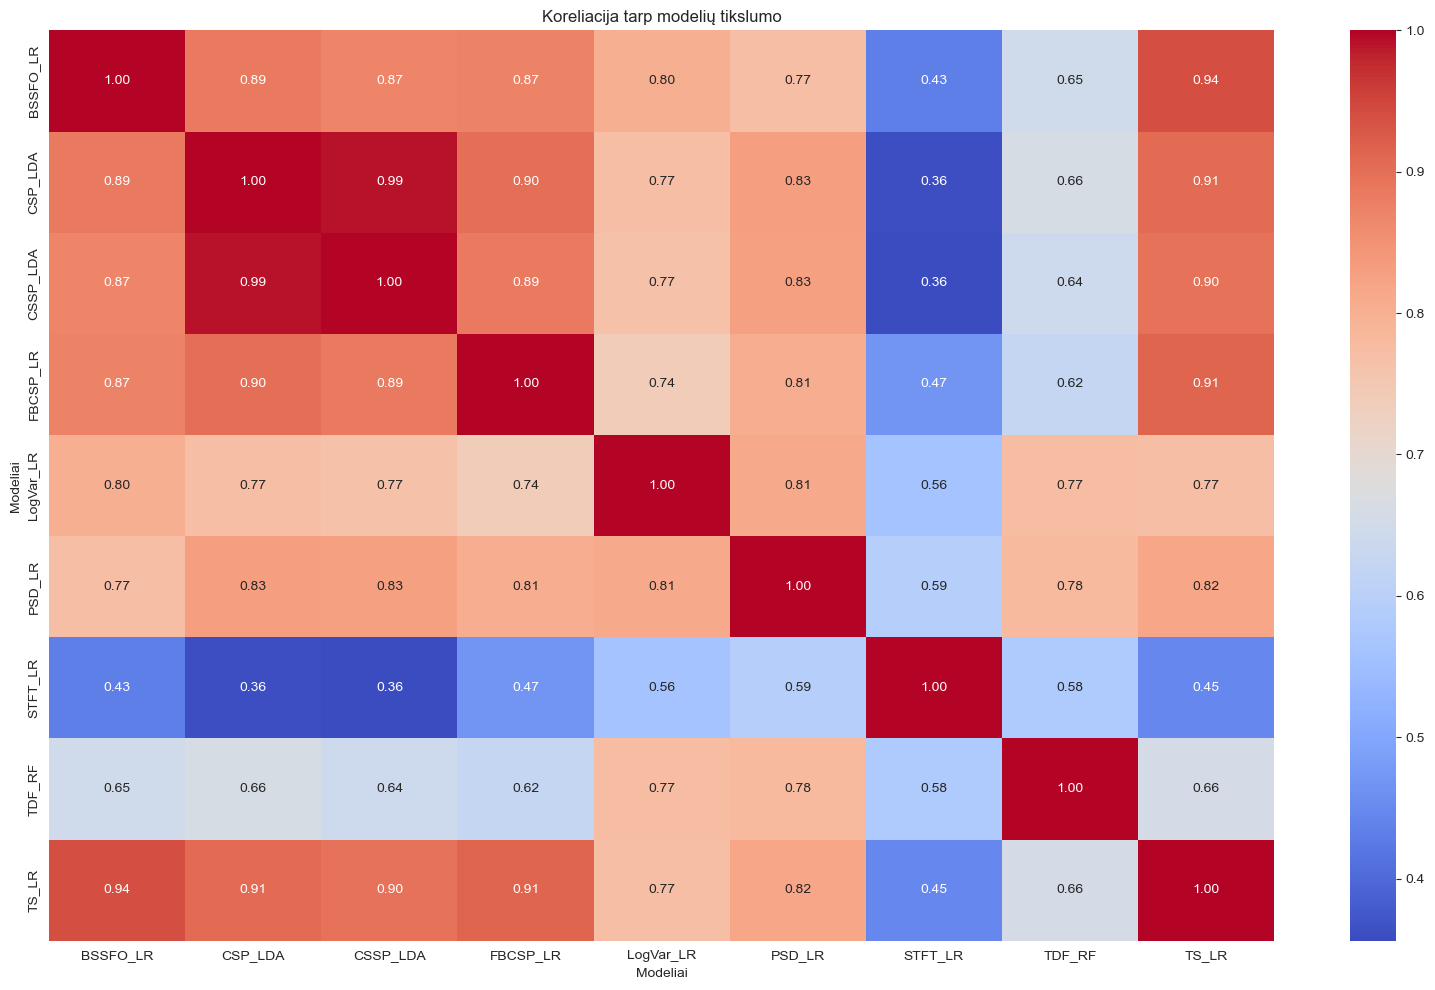

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data for correlation analysis
pivoted_data = filtered_df.pivot(index='evaluation', columns='pipeline', values='mean_val_accuracy')

# Compute correlation matrix
correlation_matrix = pivoted_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True
)
plt.title('Koreliacija tarp modelių tikslumo')
plt.xlabel('Modeliai')
plt.ylabel('Modeliai')

# Display the plot
plt.tight_layout()
plt.show()


In [71]:
filtered_df

evaluation   pipeline  mean_train_accuracy  mean_train_auc  \
2          01_1    CSP_LDA               0.5950        0.648125   
6          01_1   CSSP_LDA               0.5925        0.625875   
9          01_1   BSSFO_LR               0.9075        0.965625   
13         01_1   FBCSP_LR               0.8875        0.943500   
17         01_1     PSD_LR               1.0000        1.000000   
...         ...        ...                  ...             ...   
3725       53_2     PSD_LR               1.0000        1.000000   
3731       53_2     TDF_RF               1.0000        1.000000   
3733       53_2    STFT_LR               1.0000        1.000000   
3737       53_2  LogVar_LR               0.6550        0.720250   
3741       53_2      TS_LR               0.9975        0.999750   

      mean_val_accuracy  mean_val_auc  
2                  0.55         0.582  
6                  0.55         0.588  
9                  0.79         0.896  
13                 0.77         0.872  
17                 0.61         0.670  
...                 ...           ...  
3725               0.53         0.590  
3731               0.52         0.460  
3733               0.41         0.394  
3737               0.45         0.456  
3741               0.59         0.686  

[936 rows x 6 columns]

In [72]:
df_check

evaluation   pipeline  mean_train_accuracy  mean_train_auc  \
0          01_1    CSP_SVM               0.6400        0.696125   
1          01_1     CSP_LR               0.5950        0.639375   
2          01_1    CSP_LDA               0.5950        0.648125   
3          01_1     CSP_RF               1.0000        1.000000   
4          01_1   CSSP_SVM               0.6350        0.698875   
...         ...        ...                  ...             ...   
3739       53_2  LogVar_RF               1.0000        1.000000   
3740       53_2     TS_SVM               1.0000        1.000000   
3741       53_2      TS_LR               0.9975        0.999750   
3742       53_2     TS_LDA               0.8475        0.909250   
3743       53_2      TS_RF               1.0000        1.000000   

      mean_val_accuracy  mean_val_auc  
0                  0.55         0.626  
1                  0.61         0.610  
2                  0.55         0.582  
3                  0.56         0.589  
4                  0.54         0.614  
...                 ...           ...  
3739               0.47         0.389  
3740               0.58         0.672  
3741               0.59         0.686  
3742               0.63         0.680  
3743               0.60         0.652  

[3744 rows x 6 columns]

In [73]:
df_check[['subject', 'run']] = df_check['evaluation'].str.split('-', expand=True)


ValueError: Columns must be same length as key

In [70]:
# Split the 'evaluation' column into 'Subject_ID' and 'Run'
df_check[['Subject_ID', 'Run']] = df_check['evaluation'].str.split('-', expand=True)

# Aggregate data by Subject_ID and Run, taking the mean across all pipelines.
df_subject = df_check.groupby(['Subject_ID', 'Run'])['mean_val_accuracy'].mean().unstack()

# Drop subjects that don't have data in both runs (i.e., run "01" and run "02")
df_subject = df_subject.dropna(subset=['01', '02'])

# Now perform a paired t-test comparing Run "01" and Run "02" across subjects.
from scipy.stats import ttest_rel
stat, overall_p = ttest_rel(df_subject['01'], df_subject['02'])
print(f"Overall paired t-test p-value = {overall_p:.4f}")


ValueError: Columns must be same length as key

In [98]:
import numpy as np

# Calculate the difference between run "01" and run "02" for each subject.
diff = df_subject['01'] - df_subject['02']

# Compute the mean and standard deviation of these differences.
mean_diff = diff.mean()
std_diff = diff.std(ddof=1)

# Calculate Cohen's d.
cohen_d = mean_diff / std_diff

print(f"Cohen's d (effect size) = {cohen_d:.4f}")


Cohen's d (effect size) = -0.2915


In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import ttest_rel

# -----------------------------
# Data Preparation
# -----------------------------
# Assume `filtered_df` is your full DataFrame with columns:
# ['evaluation', 'pipeline', 'mean_train_accuracy', 'mean_train_auc',
#  'mean_val_accuracy', 'mean_val_auc', 'Subject_ID', 'Run']

# Create a pivot table for the line plot: (Run x pipeline) with mean of mean_val_accuracy.
pivot = filtered_df.pivot_table(
    index='Run',
    columns='pipeline',
    values='mean_val_accuracy',
    aggfunc='mean'
).sort_index()

# -----------------------------
# Overall Paired t-Test Calculation
# -----------------------------
# First, aggregate data by Subject_ID and Run, taking the mean across all pipelines.
df_subject = filtered_df.groupby(['Subject_ID', 'Run'])['mean_val_accuracy'].mean().unstack()

# Drop subjects that don't have data in both runs.
df_subject = df_subject.dropna(subset=['01', '02'])

# Now perform a paired t-test comparing Run "01" and Run "02" across subjects.
stat, overall_p = ttest_rel(df_subject['01'], df_subject['02'])
print(f"Overall paired t-test p-value = {overall_p:.4f}")

# -----------------------------
# Plotting
# -----------------------------
# Decide on the order of runs and numeric positions for the x-axis.
runs = sorted(filtered_df['Run'].unique())
positions = np.arange(len(runs))  # e.g., [0, 1, ...]

# Prepare the full data for boxplots (one box per run).
boxplot_data = [
    filtered_df.loc[filtered_df['Run'] == run, 'mean_val_accuracy'].values
    for run in runs
]

# Optionally, shift boxplot positions (here we keep them aligned with x-axis).
positions_box = positions

# Set a grid style from Seaborn.
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(6, 4))

# 1) Draw the boxplots first.
ax.boxplot(
    boxplot_data,
    positions=positions_box,
    widths=0.3,
    patch_artist=True,
    boxprops={'facecolor': 'lightgray', 'alpha': 0.5},
    medianprops={'color': 'black', 'linewidth': 2},
    showfliers=False,
    zorder=1
)

# 2) Draw the line plot using the pivot table.
pivot.plot(
    kind='line', marker='o', ax=ax,
    zorder=2  # ensure lines are drawn on top
)

# 3) Set x-axis ticks and labels.
ax.set_xticks(positions)
ax.set_xticklabels(runs)

# 4) Place the legend outside the plot area.
ax.legend(title='Modelis', bbox_to_anchor=(1.02, 1), loc='upper left')

# 5) Add labels and title.
ax.set_xlabel('Sesija')
ax.set_ylabel('Vidutinis tikslumas')

plt.tight_layout()
plt.show()


KeyError: 'Run'

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume filtered_df is already loaded with your data
# filtered_df columns: evaluation, pipeline, mean_train_accuracy, mean_train_auc, mean_val_accuracy, mean_val_auc, Subject_ID, Run

# Rename columns for clarity
df_plot = filtered_df.copy()
df_plot.rename(columns={
    'pipeline': 'Model',
    'mean_val_accuracy': 'Validation Accuracy',
    'Subject_ID': 'Subject'
}, inplace=True)

# Assign colors to subjects and shapes to runs
subject_ids = sorted(df_plot['Subject'].unique())
subject_color_map = {subject: color for subject, color in zip(subject_ids, sns.color_palette("hsv", len(subject_ids)))}
run_shape_map = {'01': 'x', '02': 'o'}  # Define marker shapes for runs

# If there are duplicates for a given (Model, Subject, Run) combination, average the Validation Accuracy
df_plot = df_plot.groupby(['Model', 'Subject', 'Run'], as_index=False)['Validation Accuracy'].mean()

# Sort models by their overall mean Validation Accuracy in descending order
model_order = df_plot.groupby('Model')['Validation Accuracy'].mean().sort_values(ascending=False).index
df_plot['Model'] = pd.Categorical(df_plot['Model'], categories=model_order, ordered=True)

# Identify top 10 pipelines (models) by mean Validation Accuracy
top_pipelines = df_plot.groupby('Model')['Validation Accuracy'].mean().nlargest(10).index

fig, ax = plt.subplots(figsize=(18, 9))

# Plot each subject and run using different colors and marker shapes
for subject in subject_ids:
    subject_data = df_plot[df_plot['Subject'] == subject]
    for run, shape in run_shape_map.items():
        subset = subject_data[subject_data['Run'] == run]
        sns.scatterplot(
            data=subset,
            x='Model',
            y='Validation Accuracy',
            color=subject_color_map[subject],
            marker=shape,
            s=80,      # Marker size
            alpha=0.6, # Transparency
            label=f"{subject}.{run}",
            ax=ax
        )
    
    # Connect runs for the same subject across models with a line
    subject_runs = subject_data.pivot(index='Model', columns='Run', values='Validation Accuracy')
    if '01' in subject_runs.columns and '02' in subject_runs.columns:
        # Plot both runs as separate lines, if desired; here, we connect the two points per model
        ax.plot(
            subject_runs.index,
            subject_runs[['01', '02']].values,
            color=subject_color_map[subject],
            alpha=0.6,
            linewidth=1
        )

# Function to bold and color top pipelines on the x-axis
def make_bold_xticks(ax, top_pipelines):
    xticklabels = ax.get_xticklabels()
    for label in xticklabels:
        if label.get_text() in top_pipelines:
            label.set_fontweight('bold')
            label.set_color('red')
    ax.set_xticklabels(xticklabels, rotation=45, ha='right')

# Plot the overall mean accuracy per model as a thick black line
model_means = df_plot.groupby('Model')['Validation Accuracy'].mean()
ax.plot(
    model_means.index,
    model_means.values,
    color='black',
    linewidth=3,
    alpha=1,
    label='Vidutinis tikslumas'
)

make_bold_xticks(ax, top_pipelines)

ax.set_ylabel('Validavimo tikslumas')
ax.set_xlabel('Modelis')
ax.legend(title='Tiriamasis/sesija', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=3)

# Optional: if you have a function for styling plots, call it here.
# For example: set_plot_styles(ax, title_size=18, label_size=14, tick_size=14, legend_size=12)

plt.tight_layout()
plt.show()


KeyError: 'Subject'

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

# Set style and palette
sns.set_style("whitegrid")
sns.set_palette("muted")

df_pipeline = filtered_df[filtered_df['pipeline'] == 'FBCSP_LR'].copy()

plt.figure(figsize=(12, 6))

# Plot points for each run at the same x-position per subject.
ax = sns.pointplot(
    x='subject', 
    y='mean_val_accuracy', 
    hue='run', 
    data=df_pipeline, 
    dodge=False,    # all runs share the same x position per subject
    ci=None,        # no error bars
    join=False,     # disable horizontal connecting lines
    markers='o'
)

# Increase tick label size
ax.tick_params(axis='both', which='major', labelsize=12)

# For each subject, add a vertical line spanning from the minimum to the maximum accuracy among runs.
xticks = ax.get_xticks()
for tick, subject_label in zip(xticks, ax.get_xticklabels()):
    subject = subject_label.get_text()
    subject_data = df_pipeline[df_pipeline['subject'] == subject]
    min_val = subject_data['mean_val_accuracy'].min()
    max_val = subject_data['mean_val_accuracy'].max()
    ax.vlines(x=tick, ymin=min_val, ymax=max_val, colors='gray', linestyles='-', alpha=0.7)

# Plot horizontal line at y=0.7
plt.axhline(y=0.7, color='red', linestyle='--', linewidth=2)


# Add vertical grid lines (for x-axis) similar to the horizontal grid lines
ax.xaxis.grid(True, linestyle='--', alpha=0.7)

# Create a custom legend handle for the horizontal line
custom_line = Line2D([0], [0], color='red', linestyle='--', linewidth=2)

# Get existing legend handles and labels
handles, _ = ax.get_legend_handles_labels()

# Assuming the first two handles correspond to your run groups, rename them:
new_run_labels = ["1 sesija", "2 sesija"]

# Only keep the run handles, then add the custom handle for the horizontal line
handles = handles[:len(new_run_labels)]
labels = new_run_labels

# Append the custom horizontal line handle and its label
handles.append(custom_line)
labels.append("Neraštingumo slenkstis")

# Create the legend with the new labels
# ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
ax.legend(handles=handles, labels=labels, loc='lower right', fontsize=12)

plt.xlabel('Tiriamasis', fontsize=14)
plt.ylabel('Vidutinis tikslumas', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


C:\Users\rokas\AppData\Local\Temp\ipykernel_31276\2475953588.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



ValueError: Could not interpret value `subject` for `x`. An entry with this name does not appear in `data`.

In [178]:
total_runs = len(df_pipeline)
total_runs

104

In [179]:
df_pipeline[df_pipeline['mean_val_accuracy'] < 0.7]


evaluation  pipeline  mean_train_accuracy  mean_train_auc  \
229       04-01  FBCSP_LR               0.7275        0.807250   
1921      27-02  FBCSP_LR               0.7625        0.863125   
3181      46-01  FBCSP_LR               0.7200        0.806375   

      mean_val_accuracy  mean_val_auc subject run  
229                0.61         0.680      04  01  
1921               0.66         0.754      27  02  
3181               0.68         0.742      46  01

In [181]:
# Calculate the total number of runs
total_runs = len(df_pipeline)

# Count the runs where the mean accuracy is less than 0.7
below_threshold = df_pipeline[df_pipeline['mean_val_accuracy'] < 0.7].shape[0]

# Calculate the percentage
percentage = (below_threshold / total_runs) * 100

print(f"Percentage of runs with average score less than 0.7: {percentage:.2f}%")


Percentage of runs with average score less than 0.7: 2.88%


In [66]:
import pandas as pd

# Group by 'pipeline' and calculate total runs and runs below threshold (0.7)
iliteracy_stats = filtered_df.groupby('pipeline').agg(
    total_runs=('mean_val_accuracy', 'count'),
    below_threshold=('mean_val_accuracy', lambda x: (x < 0.7).sum())
).reset_index()

# Calculate the percentage for each pipeline
iliteracy_stats['iliteracy_percentage'] = (iliteracy_stats['below_threshold'] / iliteracy_stats['total_runs']) * 100

print(iliteracy_stats)


NameError: name 'filtered_df' is not defined

In [184]:
filtered_df

evaluation   pipeline  mean_train_accuracy  mean_train_auc  \
1         01-01     CSP_LR               0.5625        0.626125   
5         01-01    CSSP_LR               0.5700        0.624000   
9         01-01   BSSFO_LR               0.7025        0.791750   
13        01-01   FBCSP_LR               0.8550        0.938000   
17        01-01     PSD_LR               1.0000        1.000000   
...         ...        ...                  ...             ...   
3725      53-02     PSD_LR               1.0000        1.000000   
3730      53-02    TDF_LDA               0.9300        0.975750   
3735      53-02    STFT_RF               1.0000        1.000000   
3737      53-02  LogVar_LR               0.8775        0.952625   
3741      53-02      TS_LR               1.0000        1.000000   

      mean_val_accuracy  mean_val_auc subject run  
1                  0.48         0.480      01  01  
5                  0.49         0.490      01  01  
9                  0.52         0.556      01  01  
13                 0.79         0.908      01  01  
17                 0.65         0.678      01  01  
...                 ...           ...     ...  ..  
3725               0.55         0.542      53  02  
3730               0.66         0.756      53  02  
3735               0.48         0.495      53  02  
3737               0.60         0.622      53  02  
3741               0.69         0.758      53  02  

[936 rows x 8 columns]

In [37]:
df_check.head()

evaluation  pipeline  mean_train_accuracy  mean_train_auc  \
0      01-01   CSP_SVM               0.5925        0.677000   
1      01-01    CSP_LR               0.5625        0.626125   
2      01-01   CSP_LDA               0.5675        0.632000   
3      01-01    CSP_RF               1.0000        1.000000   
4      01-01  CSSP_SVM               0.6025        0.678375   

   mean_val_accuracy  mean_val_auc  
0               0.49         0.454  
1               0.48         0.480  
2               0.43         0.442  
3               0.51         0.516  
4               0.51         0.482

In [77]:
# Compute the average validation accuracy per pipeline
pipeline_avg = df_check.copy().groupby("pipeline")["mean_val_accuracy"].mean().reset_index()

# Sort the pipelines in descending order (best performing first)
pipeline_avg = pipeline_avg.sort_values(by="mean_val_accuracy", ascending=False)

# Assign a rank: 1 = best
pipeline_avg["rank"] = range(1, len(pipeline_avg) + 1)

pipeline_avg


pipeline  mean_val_accuracy  rank
33       TS_LR           0.727500     1
13    FBCSP_LR           0.711731     2
8     CSSP_LDA           0.709038     3
4      CSP_LDA           0.706346     4
1     BSSFO_LR           0.706154     5
15   FBCSP_SVM           0.705769     6
5       CSP_LR           0.704615     7
9      CSSP_LR           0.702885     8
35      TS_SVM           0.701731     9
14    FBCSP_RF           0.696923    10
12   FBCSP_LDA           0.694808    11
10     CSSP_RF           0.693750    12
7      CSP_SVM           0.689423    13
6       CSP_RF           0.689327    14
11    CSSP_SVM           0.688846    15
0    BSSFO_LDA           0.687308    16
34       TS_RF           0.682019    17
3    BSSFO_SVM           0.681154    18
2     BSSFO_RF           0.671635    19
32      TS_LDA           0.670000    20
17   LogVar_LR           0.644231    21
16  LogVar_LDA           0.639231    22
21      PSD_LR           0.622692    23
20     PSD_LDA           0.615385    24
22      PSD_RF           0.614038    25
23     PSD_SVM           0.609615    26
18   LogVar_RF           0.603077    27
30      TDF_RF           0.602115    28
19  LogVar_SVM           0.595962    29
28     TDF_LDA           0.571731    30
31     TDF_SVM           0.556731    31
29      TDF_LR           0.550577    32
25     STFT_LR           0.540769    33
27    STFT_SVM           0.538846    34
24    STFT_LDA           0.534423    35
26     STFT_RF           0.532500    36

In [61]:
paths = glob.glob(r'C:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\results\pipeline_scores\lee2019\2025-03-31\\*.pkl')
evaluations = {}
for path in paths:
    filename = os.path.basename(path)
    subject_run = filename.split('_')[-3]
    file = pd.read_pickle(path)
    if subject_run not in evaluations:
        file.pop('single_pipeline')
        evaluations[subject_run] = file

In [62]:
evaluations

{'01-01': {'CSP_SVM': {'train_accuracy': array([0.5625, 0.6125, 0.575 , 0.575 , 0.6375]),
   'train_roc_auc': array([0.666875, 0.670625, 0.69    , 0.716875, 0.640625]),
   'val_accuracy': array([0.5 , 0.45, 0.5 , 0.5 , 0.5 ]),
   'val_roc_auc': array([0.36, 0.47, 0.54, 0.46, 0.44]),
   'mean_train_accuracy': 0.5925,
   'mean_train_auc': 0.6769999999999999,
   'mean_val_accuracy': 0.49000000000000005,
   'mean_val_auc': 0.454,
   'feat_resources_used': {'CPU_time_used(sec)': 17.734375,
    'Wall-clock_time_used(sec)': 2.728773899987573,
    'Memory_change(MB)': 38.44140625},
   'class_resources_used': {'CPU_time_used(sec)': 0.984375,
    'Wall-clock_time_used(sec)': 3.9695725000055972,
    'Memory_change(MB)': 0.640625},
   'recourses_per_pipeline': {'CPU_time_used(sec)': 18.71875,
    'Wall-clock_time_used(sec)': 6.69834639999317,
    'Memory_change(MB)': 39.08203125}},
  'CSP_LR': {'train_accuracy': array([0.5125, 0.5625, 0.5375, 0.6   , 0.6   ]),
   'train_roc_auc': array([0.62375 , 

In [48]:
records = []
for eval_date, pipelines in evaluations.items():
    for pipeline, metrics in pipelines.items():
        record = {'evaluation': eval_date, 'pipeline': pipeline}
        for key, value in metrics.items():
            if isinstance(value, dict):
                for subkey, subvalue in value.items():
                    record[f"{key}_{subkey}"] = subvalue
            else:
                record[key] = value
        records.append(record)

df = pd.DataFrame(records)
metrics = ['train_accuracy', 'train_roc_auc', 'val_accuracy', 'val_roc_auc']

# for col in metrics:
#     expanded = pd.DataFrame(df[col].tolist(), index=df.index)
#     expanded = expanded.add_prefix(col + '_')
#     df = df.drop(columns=[col]).join(expanded)

# n_passes = df.filter(regex=r'^train_accuracy_').shape[1]

# ordered_metric_cols = []
# for i in range(n_passes):
#     for metric in metrics:
#         col_name = f"{metric}_{i}"
#         if col_name in df.columns:
#             ordered_metric_cols.append(col_name)

# other_cols = [col for col in df.columns if not any(col.startswith(m + '_') for m in metrics)]

# df = df[other_cols + ordered_metric_cols]


In [ ]:
df 

evaluation    pipeline                       train_accuracy  \
0          fh     CSP_SVM     [0.675, 0.75, 0.75, 0.75, 0.625]   
1          fh      CSP_LR   [0.625, 0.625, 0.675, 0.65, 0.625]   
2          fh     CSP_LDA     [0.675, 0.675, 0.7, 0.675, 0.55]   
3          fh      CSP_RF            [1.0, 1.0, 1.0, 1.0, 1.0]   
4          fh    CSSP_SVM     [0.85, 0.875, 0.8, 0.775, 0.825]   
5          fh     CSSP_LR  [0.825, 0.875, 0.825, 0.725, 0.825]   
6          fh    CSSP_LDA       [0.8, 0.85, 0.8, 0.725, 0.825]   
7          fh     CSSP_RF            [1.0, 1.0, 1.0, 1.0, 1.0]   
8          fh   BSSFO_SVM   [0.725, 0.65, 0.725, 0.625, 0.775]   
9          fh    BSSFO_LR         [0.8, 0.725, 0.8, 0.75, 0.8]   
10         fh   BSSFO_LDA   [0.825, 0.825, 0.775, 0.875, 0.85]   
11         fh    BSSFO_RF            [1.0, 1.0, 1.0, 1.0, 1.0]   
12         fh   FBCSP_SVM     [0.9, 0.95, 0.975, 0.925, 0.925]   
13         fh    FBCSP_LR      [0.95, 0.95, 0.975, 0.95, 0.95]   
14         fh   FBCSP_LDA   [0.925, 0.95, 0.975, 0.925, 0.925]   
15         fh    FBCSP_RF            [1.0, 1.0, 1.0, 1.0, 1.0]   
16         fh     PSD_SVM     [0.675, 1.0, 0.825, 0.75, 0.925]   
17         fh      PSD_LR            [1.0, 1.0, 1.0, 1.0, 1.0]   
18         fh     PSD_LDA       [0.825, 0.8, 0.825, 0.9, 0.85]   
19         fh      PSD_RF            [1.0, 1.0, 1.0, 1.0, 1.0]   
20         fh     TDF_SVM    [0.675, 0.65, 0.675, 0.65, 0.675]   
21         fh      TDF_LR    [0.525, 0.525, 0.525, 0.5, 0.675]   
22         fh     TDF_LDA    [0.85, 0.825, 0.825, 0.75, 0.825]   
23         fh      TDF_RF            [1.0, 1.0, 1.0, 1.0, 1.0]   
24         fh    STFT_SVM          [1.0, 1.0, 0.975, 1.0, 1.0]   
25         fh     STFT_LR            [1.0, 1.0, 1.0, 1.0, 1.0]   
26         fh    STFT_LDA   [0.725, 0.775, 0.775, 0.75, 0.725]   
27         fh     STFT_RF            [1.0, 1.0, 1.0, 1.0, 1.0]   
28         fh  LogVar_SVM         [0.725, 0.9, 0.75, 0.7, 0.8]   
29         fh   LogVar_LR     [0.925, 0.875, 0.95, 0.9, 0.875]   
30         fh  LogVar_LDA  [0.975, 0.975, 0.975, 0.975, 0.975]   
31         fh   LogVar_RF            [1.0, 1.0, 1.0, 1.0, 1.0]   
32         fh      TS_SVM            [1.0, 1.0, 1.0, 1.0, 1.0]   
33         fh       TS_LR            [1.0, 1.0, 1.0, 1.0, 1.0]   
34         fh      TS_LDA       [0.6, 0.575, 0.575, 0.6, 0.55]   
35         fh       TS_RF            [1.0, 1.0, 1.0, 1.0, 1.0]   

                                        train_roc_auc  \
0   [0.7994987468671679, 0.7393483709273183, 0.804...   
1   [0.6867167919799498, 0.7017543859649122, 0.686...   
2   [0.6766917293233082, 0.6766917293233083, 0.704...   
3                           [1.0, 1.0, 1.0, 1.0, 1.0]   
4   [0.9348370927318297, 0.93734335839599, 0.92982...   
5   [0.8947368421052632, 0.924812030075188, 0.8922...   
6   [0.8796992481203008, 0.9223057644110275, 0.872...   
7                           [1.0, 1.0, 1.0, 1.0, 1.0]   
8   [0.8095238095238095, 0.8020050125313283, 0.804...   
9   [0.8947368421052632, 0.8345864661654135, 0.879...   
10  [0.9523809523809523, 0.9097744360902256, 0.924...   
11                          [1.0, 1.0, 1.0, 1.0, 1.0]   
12  [0.9874686716791979, 0.9899749373433584, 1.0, ...   
13  [0.9949874686716792, 0.9899749373433584, 1.0, ...   
14  [0.9824561403508772, 0.9849624060150375, 1.0, ...   
15                          [1.0, 1.0, 1.0, 1.0, 1.0]   
16  [1.0, 1.0, 0.9874686716791979, 0.9724310776942...   
17                          [1.0, 1.0, 1.0, 1.0, 1.0]   
18  [0.8922305764411027, 0.8947368421052632, 0.872...   
19                          [1.0, 1.0, 1.0, 1.0, 1.0]   
20  [0.6290726817042607, 0.6817042606516291, 0.766...   
21  [0.6090225563909775, 0.6591478696741855, 0.726...   
22  [0.8696741854636592, 0.9323308270676692, 0.897...   
23                          [1.0, 1.0, 1.0, 1.0, 1.0]   
24                          [1.0, 1.0, 1.0, 1.0, 1.0]   
25                          [1.0, 1.0, 1.0, 1.0, 1.0]   
26  [0.79448621553884

In [37]:
evaluations['fh'].keys()

dict_keys(['CSP_SVM', 'CSP_LR', 'CSP_LDA', 'CSP_RF', 'CSSP_SVM', 'CSSP_LR', 'CSSP_LDA', 'CSSP_RF', 'BSSFO_SVM', 'BSSFO_LR', 'BSSFO_LDA', 'BSSFO_RF', 'FBCSP_SVM', 'FBCSP_LR', 'FBCSP_LDA', 'FBCSP_RF', 'PSD_SVM', 'PSD_LR', 'PSD_LDA', 'PSD_RF', 'TDF_SVM', 'TDF_LR', 'TDF_LDA', 'TDF_RF', 'STFT_SVM', 'STFT_LR', 'STFT_LDA', 'STFT_RF', 'LogVar_SVM', 'LogVar_LR', 'LogVar_LDA', 'LogVar_RF', 'TS_SVM', 'TS_LR', 'TS_LDA', 'TS_RF'])

In [ ]:
def clean_results(paths):
    evaluations = {}
    for path in paths:
        filename = os.path.basename(path)
        subject_run = filename.split('_')[-3]
        file = pd.read_pickle(path)
        if subject_run not in evaluations:
            file.pop('single_pipeline')
            evaluations[subject_run] = file
            
    records = []
    for eval_date, pipelines in evaluations.items():
        for pipeline, metrics in pipelines.items():
            record = {'evaluation': eval_date, 'pipeline': pipeline}
            for key, value in metrics.items():
                if isinstance(value, dict):
                    for subkey, subvalue in value.items():
                        record[f"{key}_{subkey}"] = subvalue
                else:
                    record[key] = value
            records.append(record)

    df = pd.DataFrame(records)

    metrics = ['train_accuracy', 'train_roc_auc', 'val_accuracy', 'val_roc_auc']

    for col in metrics:
        expanded = pd.DataFrame(df[col].tolist(), index=df.index)
        expanded = expanded.add_prefix(col + '_')
        df = df.drop(columns=[col]).join(expanded)

    n_passes = df.filter(regex=r'^train_accuracy_').shape[1]

    ordered_metric_cols = []
    for i in range(n_passes):
        for metric in metrics:
            col_name = f"{metric}_{i}"
            if col_name in df.columns:
                ordered_metric_cols.append(col_name)

    other_cols = [col for col in df.columns if not any(col.startswith(m + '_') for m in metrics)]

    df = df[other_cols + ordered_metric_cols]

    df_plot = df[['evaluation', 'pipeline', 'mean_train_accuracy', 'mean_train_auc','mean_val_accuracy','mean_val_auc']]
    return df_plot

In [42]:
df_raw = clean_results(glob.glob(r'C:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\results\pipeline_scores\lee2019\2025-03-31\\*.pkl'))
df_fh = clean_results(glob.glob(r'C:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\results\pipeline_scores\lee2019\2025-03-31_halfs\\*fh*.pkl'))
df_sh = clean_results(glob.glob(r'C:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\results\pipeline_scores\lee2019\2025-03-31_halfs\\*sh*.pkl'))


In [43]:
df_fh

evaluation    pipeline  mean_train_accuracy  mean_train_auc  \
0          fh     CSP_SVM                0.710        0.785076   
1          fh      CSP_LR                0.640        0.690395   
2          fh     CSP_LDA                0.655        0.667362   
3          fh      CSP_RF                1.000        1.000000   
4          fh    CSSP_SVM                0.825        0.926856   
5          fh     CSSP_LR                0.815        0.893781   
6          fh    CSSP_LDA                0.800        0.880254   
7          fh     CSSP_RF                1.000        1.000000   
8          fh   BSSFO_SVM                0.700        0.813643   
9          fh    BSSFO_LR                0.775        0.870733   
10         fh   BSSFO_LDA                0.830        0.926853   
11         fh    BSSFO_RF                1.000        1.000000   
12         fh   FBCSP_SVM                0.935        0.988979   
13         fh    FBCSP_LR                0.955        0.993987   
14         fh   FBCSP_LDA                0.940        0.986475   
15         fh    FBCSP_RF                1.000        1.000000   
16         fh     PSD_SVM                0.835        0.989480   
17         fh      PSD_LR                1.000        1.000000   
18         fh     PSD_LDA                0.840        0.878771   
19         fh      PSD_RF                1.000        1.000000   
20         fh     TDF_SVM                0.665        0.704405   
21         fh      TDF_LR                0.550        0.675848   
22         fh     TDF_LDA                0.815        0.894291   
23         fh      TDF_RF                1.000        1.000000   
24         fh    STFT_SVM                0.995        1.000000   
25         fh     STFT_LR                1.000        1.000000   
26         fh    STFT_LDA                0.750        0.798091   
27         fh     STFT_RF                1.000        1.000000   
28         fh  LogVar_SVM                0.775        0.897288   
29         fh   LogVar_LR                0.905        0.964420   
30         fh  LogVar_LDA                0.975        0.997494   
31         fh   LogVar_RF                1.000        1.000000   
32         fh      TS_SVM                1.000        1.000000   
33         fh       TS_LR                1.000        1.000000   
34         fh      TS_LDA                0.580        0.634761   
35         fh       TS_RF                1.000        1.000000   

    mean_val_accuracy  mean_val_auc  
0                0.58      0.637000  
1                0.54      0.621333  
2                0.52      0.516667  
3                0.58      0.628667  
4                0.74      0.855333  
5                0.80      0.862667  
6                0.78      0.846333  
7                0.70      0.823333  
8                0.46      0.508667  
9                0.52      0.588333  
10               0.54      0.540333  
11               0.44      0.537000  
12               0.92      0.952000  
13               0.90      0.976000  
14               0.88      0.968000  
15               0.90      0.936000  
16               0.40      0.347333  
17               0.54      0.476667  
18               0.48      0.475000  
19               0.44      0.472333  
20               0.58      0.652333  
21               0.46      0.644000  
22               0.54      0.469000  
23               0.34      0.432500  
24               0.60      0.388333  
25               0.52      0.493333  
26               0.44      0.429000  
27               0.48      0.469667  
28               0.34      0.266000  
29               0.56      0.573333  
30               0.50      0.644667  
31               0.42      0.456000  
32               0.58      0.718333  
33               0.82      0.880000  
34               0.58      0.644667  
35               0.72      0.781000

In [40]:
df_raw

evaluation   pipeline  mean_train_accuracy  mean_train_auc  \
0         01-01    CSP_SVM               0.5925        0.677000   
1         01-01     CSP_LR               0.5625        0.626125   
2         01-01    CSP_LDA               0.5675        0.632000   
3         01-01     CSP_RF               1.0000        1.000000   
4         01-01   CSSP_SVM               0.6025        0.678375   
...         ...        ...                  ...             ...   
3739      53-02  LogVar_RF               1.0000        1.000000   
3740      53-02     TS_SVM               0.9975        1.000000   
3741      53-02      TS_LR               1.0000        1.000000   
3742      53-02     TS_LDA               0.6850        0.727000   
3743      53-02      TS_RF               1.0000        1.000000   

      mean_val_accuracy  mean_val_auc  
0                  0.49         0.454  
1                  0.48         0.480  
2                  0.43         0.442  
3                  0.51         0.516  
4                  0.51         0.482  
...                 ...           ...  
3739               0.62         0.644  
3740               0.61         0.694  
3741               0.69         0.758  
3742               0.67         0.722  
3743               0.61         0.682  

[3744 rows x 6 columns]

In [189]:
df_sh

evaluation    pipeline  mean_train_accuracy  mean_train_auc  \
0          sh     CSP_SVM                0.570        0.713951   
1          sh      CSP_LR                0.620        0.658352   
2          sh     CSP_LDA                0.645        0.708444   
3          sh      CSP_RF                1.000        1.000000   
4          sh    CSSP_SVM                0.565        0.721462   
5          sh     CSSP_LR                0.610        0.651845   
6          sh    CSSP_LDA                0.625        0.708451   
7          sh     CSSP_RF                1.000        1.000000   
8          sh   BSSFO_SVM                0.620        0.853722   
9          sh    BSSFO_LR                0.835        0.910320   
10         sh   BSSFO_LDA                0.900        0.948893   
11         sh    BSSFO_RF                1.000        1.000000   
12         sh   FBCSP_SVM                0.865        0.910311   
13         sh    FBCSP_LR                0.900        0.943386   
14         sh   FBCSP_LDA                0.910        0.966430   
15         sh    FBCSP_RF                1.000        1.000000   
16         sh     PSD_SVM                0.795        0.994491   
17         sh      PSD_LR                1.000        1.000000   
18         sh     PSD_LDA                0.810        0.888776   
19         sh      PSD_RF                1.000        1.000000   
20         sh     TDF_SVM                0.535        0.652810   
21         sh      TDF_LR                0.520        0.587678   
22         sh     TDF_LDA                0.800        0.898802   
23         sh      TDF_RF                1.000        1.000000   
24         sh    STFT_SVM                1.000        1.000000   
25         sh     STFT_LR                1.000        1.000000   
26         sh    STFT_LDA                0.745        0.781059   
27         sh     STFT_RF                1.000        1.000000   
28         sh  LogVar_SVM                0.795        0.913348   
29         sh   LogVar_LR                0.935        0.957922   
30         sh  LogVar_LDA                0.980        0.998999   
31         sh   LogVar_RF                1.000        1.000000   
32         sh      TS_SVM                0.995        1.000000   
33         sh       TS_LR                1.000        1.000000   
34         sh      TS_LDA                0.595        0.618727   
35         sh       TS_RF                1.000        1.000000   

    mean_val_accuracy  mean_val_auc  
0                0.48      0.575333  
1                0.46      0.575000  
2                0.62      0.678333  
3                0.66      0.647000  
4                0.48      0.591000  
5                0.46      0.590667  
6                0.60      0.654333  
7                0.64      0.678667  
8                0.48      0.501000  
9                0.52      0.637000  
10               0.62      0.685000  
11               0.58      0.644833  
12               0.76      0.878667  
13               0.82      0.895000  
14               0.78      0.895000  
15               0.70      0.847000  
16               0.46      0.540333  
17               0.60      0.573000  
18               0.54      0.557667  
19               0.50      0.479000  
20               0.48      0.194000  
21               0.48      0.371333  
22               0.50      0.587667  
23               0.66      0.691667  
24               0.44      0.466667  
25               0.54      0.500333  
26               0.50      0.474667  
27               0.40      0.410167  
28               0.64      0.598000  
29               0.54      0.654333  
30               0.56      0.564667  
31               0.64      0.703667  
32               0.48      0.500333  
33               0.60      0.639000  
34               0.52      0.629333  
35               0.52      0.443500

In [24]:
dataset = df_sh[df_sh.mean_val_accuracy >= 0.7]
dataset

evaluation   pipeline  mean_train_accuracy  mean_train_auc  \
12         sh  FBCSP_SVM                0.865        0.910311   
13         sh   FBCSP_LR                0.900        0.943386   
14         sh  FBCSP_LDA                0.910        0.966430   
15         sh   FBCSP_RF                1.000        1.000000   

    mean_val_accuracy  mean_val_auc Sesija    Modelis  
12               0.76      0.878667     sh  FBCSP_SVM  
13               0.82      0.895000     sh   FBCSP_LR  
14               0.78      0.895000     sh  FBCSP_LDA  
15               0.70      0.847000     sh   FBCSP_RF

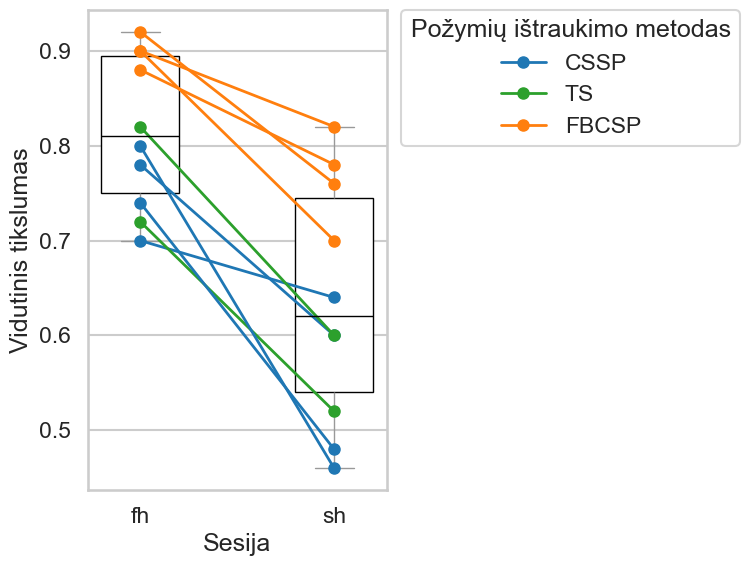

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_raw = clean_results(glob.glob(r'C:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\results\pipeline_scores\lee2019\2025-03-31\\*.pkl'))
df_fh = clean_results(glob.glob(r'C:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\results\pipeline_scores\lee2019\2025-03-31_halfs\\*fh*.pkl'))
df_sh = clean_results(glob.glob(r'C:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\results\pipeline_scores\lee2019\2025-03-31_halfs\\*sh*.pkl'))

# --- Example Setup ---
# We assume df_fh and df_sh each have columns: ['pipeline', 'mean_val_accuracy']
# and you want to compare 'mean_val_accuracy' between the first half (fh) and second half (sh).

# 1. Label each dataframe with the session/half and set the model name.
df_sh = df_sh[df_fh.mean_val_accuracy >= 0.7]
df_fh = df_fh[df_fh.mean_val_accuracy >= 0.7]

df_fh['Sesija'] = 'fh'
df_sh['Sesija'] = 'sh'
df_fh['Modelis'] = df_fh['pipeline']
df_sh['Modelis'] = df_sh['pipeline']

# 2. Concatenate the two dataframes.
df = pd.concat([df_fh, df_sh], ignore_index=True)

# 3. Choose the metric to compare.
metric = 'mean_val_accuracy'
y_label = 'Vidutinis tikslumas'

# --- Seaborn styling ---
sns.set_theme(style="whitegrid", context="talk")

# 4. Create the figure and axes.
fig, ax = plt.subplots(figsize=(8,6))

# 5. Draw a boxplot for each session (fh and sh). Specify the order so 'fh' is left and 'sh' right.
sns.boxplot(
    x='Sesija',
    y=metric,
    data=df,
    order=['fh','sh'],
    width=0.4,
    color='white',
    showfliers=True,     # set to False if you prefer to hide outliers
    boxprops=dict(edgecolor='black'),
    medianprops=dict(color='black'),
    ax=ax
)

# 6. Create a pivot table: each row corresponds to a model (pipeline),
#    with its 'fh' and 'sh' metric values.
df_pivot = df.pivot(index='Modelis', columns='Sesija', values=metric).reset_index()

# 7. Sort the pivot table by the 'fh' values (to help reduce line crossing).
df_pivot = df_pivot.sort_values(by='fh', ascending=True)

# 8. Create a new column for the feature extraction method
#    (i.e. everything before the underscore).
df_pivot['method'] = df_pivot['Modelis'].apply(lambda x: x.split('_')[0])

# 9. Determine unique feature extraction methods and assign each a color.
unique_methods = sorted(df_pivot['method'].unique())
palette_method = sns.color_palette("tab10", n_colors=len(unique_methods))
method_color = {m: palette_method[i] for i, m in enumerate(unique_methods)}

# 10. Plot a line for each model (row) with markers for fh and sh.
#     Label only once per feature extraction method.
added_methods = set()
for i, row in df_pivot.iterrows():
    fh_val = row['fh']
    sh_val = row['sh']
    method = row['method']
    # Only add label for the first occurrence of this method.
    label = method if method not in added_methods else "_nolegend_"
    added_methods.add(method)
    ax.plot(
        [0, 1],         # x-coordinates corresponding to 'fh' (0) and 'sh' (1)
        [fh_val, sh_val],
        marker='o',
        label=label,
        color=method_color[method],
        linewidth=2,
        markersize=8
    )

# 11. Customize axis labels and ticks.
ax.set_xlabel('Sesija')
ax.set_ylabel(y_label)
ax.set_xticks([0, 1])
ax.set_xticklabels(['fh', 'sh'])

# 12. Create the legend (now grouping by feature extraction method).
ax.legend(
    title='Požymių ištraukimo metodas',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0.
)

fig.tight_layout()
plt.show()
